In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [13]:
def generate_data(n,w0=4,w1=3):
    X=10*np.random.rand(n,)
    y=w0+w1*X+np.random.randn(n,)
    return X,y

def add_dummy_feature(x):
    # Adds the 1 1 1.. in each row for x0 value.
    return np.column_stack((np.ones(x.shape[0]),x))

def preprocess(X,y):
    X=add_dummy_feature(X)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
#     X_train=add_dummy_feature(X_train)
#     X_test=add_dummy_feature(X_test)
    return X_train,X_test,y_train,y_test
def Predict(X,w):
    assert X.shape[-1]==w.shape[0],"X and w don't have compatible dimensions"
    return (X @ w)

def non_vectorized_predict(X,w):
    y=[]
    for i in range(0,X.shape[0]):
        y_hat_i=0
        for j in range(0,X.shape[1]):
            y_hat_i+=X[i][j]*w[j]
        y.append(y_hat_i)
    return np.array(y) 

def loss(X,y,w):
    e=y-Predict(X,w)
    return (1/2)*(np.transpose(e)@e)
import unittest
class TestLossFunction(unittest.TestCase):
    def test_loss_function(self):
        feature_matrix=np.array([[1,3,2,5],[1,9,4,7]])
        weight_vector=np.array([1,1,1,1])
        label_vector=np.array([6,11])
        expected_loss=np.array([62.5])
        loss_value=loss(feature_matrix,label_vector,weight_vector)
        self.assertEqual(loss_value.shape,())
        np.testing.assert_array_equal(expected_loss,loss_value)
unittest.main(argv=[''],defaultTest='TestLossFunction',verbosity=2,exit=False)

test_loss_function (__main__.TestLossFunction) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [3]:
w1=3
w0=4
n=100
X=10*np.random.rand(n,)
y=w0+w1*X+np.random.randn(n,) #Noise is added as np.random.randn

In [4]:
print("Shape of training data:",X.shape)
print("Shape of label vector:",y.shape)

Shape of training data: (100,)
Shape of label vector: (100,)


In [5]:

#For splitting we shall use the sklearn
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)

In [6]:
# Can try and check the test and train datasets shapes for sanity check and needs to be present

In [7]:
X_train[:5]

array([3.05650593, 5.21759106, 0.81308509, 7.7531595 , 2.98965833])

In [8]:
y_train[:5]

array([12.79722011, 21.40292141,  6.43013688, 27.82279883, 13.40947604])

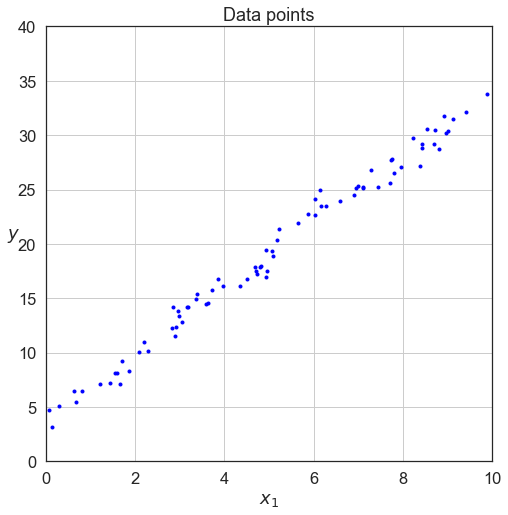

In [9]:
sns.set_style('white')
f=plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5,rc={'lines.linewidth':2.5})

plt.plot(X_train,y_train,'b.')
plt.title('Data points')
plt.grid(True)
plt.xlabel('$x_1$',fontsize=18)
plt.ylabel('$y$',rotation=0,fontsize=18)
plt.axis([0,10,0,40])
plt.show()

In [10]:
X_train_with_dummy=add_dummy_feature(X_train)
print(X_train_with_dummy[:5])

[[1.         3.05650593]
 [1.         5.21759106]
 [1.         0.81308509]
 [1.         7.7531595 ]
 [1.         2.98965833]]


In [11]:
###### Model

In [12]:
w=np.random.rand(2,)
w

array([0.37226094, 0.17854693])

In [13]:
y_hat=Predict(X_train_with_dummy,w)

In [14]:
y_hat[:10]

array([0.9179907 , 1.30384582, 0.51743479, 1.75656379, 0.90605526,
       0.38608293, 1.44924465, 1.74928881, 1.75395401, 1.67233329])

In [15]:
y_train[:10]

array([12.79722011, 21.40292141,  6.43013688, 27.82279883, 13.40947604,
        4.69454425, 22.68042376, 25.56184249, 27.6783349 , 26.77358879])

In [16]:
###### Loss

In [17]:
w=np.random.rand(2,) #weights creation

In [18]:
def generate_dataset(n,w0=4,w1=3):
    X=10*np.random.rand(n,)
    y=w0+w1*X+np.random.randn(n,)
    return X,y
#Data generation
X,y=generate_dataset(100)
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [19]:
X_train_dummy=add_dummy_feature(X_train)
X_test_dummy=add_dummy_feature(X_test)


In [20]:
for point in X_train[:5]:
    print(point,w[0]+point*w[1])

7.272762312205266 1.87079736480346
8.113425021780444 2.0549888024044334
4.071826818479286 1.1694638768992416
1.3626308271940457 0.5758718230423574
2.9121727098216645 0.9153805745704596


In [21]:
X_train_dummy@w

array([1.87079736, 2.0549888 , 1.16946388, 0.57587182, 0.91538057,
       0.77901215, 0.61979894, 1.0062264 , 0.36807218, 0.90159615,
       0.48338813, 0.77383809, 0.8252241 , 2.35068513, 2.30468712,
       0.83177234, 0.83267267, 2.1411075 , 1.17200902, 1.0054743 ,
       0.68348743, 0.40364576, 2.16561909, 1.18146549, 1.73433076,
       1.88235349, 1.98477143, 0.67342211, 1.5640268 , 2.09244418,
       1.02911198, 0.93082141, 0.88264357, 1.67255166, 2.43154957,
       2.07118769, 2.06220074, 1.40663423, 0.44835003, 1.98067486,
       0.53508314, 1.75041199, 0.44009179, 0.51045159, 0.57307522,
       1.13952549, 1.92252406, 2.4548452 , 1.13116459, 1.77972007,
       0.86025764, 2.20902493, 2.45873785, 2.14529432, 1.77126879,
       2.11977861, 0.45685047, 0.48663028, 0.68723781, 0.41551145,
       0.59257791, 1.92313142, 0.51691464, 1.69397533, 1.77904416,
       0.93761902, 0.73634188, 0.9846776 , 2.1021766 , 1.13540301,
       2.16358304, 0.99894508, 2.3678863 , 0.37500432, 2.20548

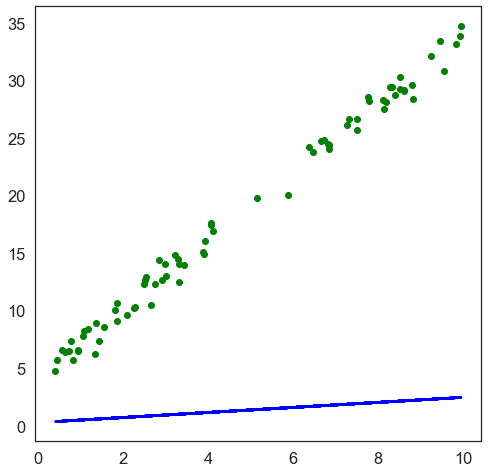

In [22]:
plt.figure(figsize=(8,8))
plt.scatter(X_train,y_train,color='green')
plt.plot(X_train,X_train_dummy@w,color='blue')



In [23]:
import time
s=time.time()
X,y=generate_dataset(100)
X_train,X_test,y_train,y_test=train_test_split(X,y)
w=np.random.rand(2,)
X_Tr=add_dummy_feature(X_train)
Loss=loss(X_Tr,y_train,w)#vectorized
#non-vectorized
e=time.time()
print(e-s)

0.0030655860900878906


<h6  style="font-family: Courier New">Normal Equation</h6>

In [24]:
def normal_equation(X,y):
    return np.linalg.pinv(X)@y

In [25]:
def generate_data(n,w0=4,w1=3):
    X=10*np.random.rand(n,)
    y=w0+w1*X+np.random.randn(n,)
    return X,y

def add_dummy_feature(x):
    # Adds the 1 1 1.. in each row for x0 value.
    return np.column_stack((np.ones(x.shape[0]),x))

def preprocess(X,y):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=42)
    X_train=add_dummy_feature(X_train)
    X_test=add_dummy_feature(X_test)
    return X_train,X_test,y_train,y_test
def Predict(X,w):
    assert X.shape[-1]==w.shape[0],"X and w don't have compatible dimensions"
    return (X @ w)

def non_vectorized_predict(X,w):
    y=[]
    for i in range(0,X.shape[0]):
        y_hat_i=0
        for j in range(0,X.shape[1]):
            y_hat_i+=X[i][j]*w[j]
        y.append(y_hat_i)
    return np.array(y) 

def loss(X,y,w):
    e=y-Predict(X,w)
    return (1/2)*(np.transpose(e)@e)
import unittest
class TestLossFunction(unittest.TestCase):
    def test_loss_function(self):
        feature_matrix=np.array([[1,3,2,5],[1,9,4,7]])
        weight_vector=np.array([1,1,1,1])
        label_vector=np.array([6,11])
        expected_loss=np.array([62.5])
        loss_value=loss(feature_matrix,label_vector,weight_vector)
        self.assertEqual(loss_value.shape,())
        np.testing.assert_array_equal(expected_loss,loss_value)
unittest.main(argv=[''],defaultTest='TestLossFunction',verbosity=2,exit=False)

test_loss_function (__main__.TestLossFunction) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [26]:
X,y=generate_data(1000)

In [27]:
X[:5],y[:5]

(array([1.61478147, 9.5633823 , 1.31456795, 2.45501621, 7.2624008 ]),
 array([ 9.83927074, 31.93019179,  7.21625114, 10.14454683, 26.35667154]))

In [28]:
features,labels=generate_data(10)
X_train,X_test,y_train,y_test=preprocess(X,y)
class TestNormalEquation(unittest.TestCase):
    def test_normal_equation(self):
        feature_matrix=X_train
        label_vector=y_train
        expected_weight=np.array([4.,3.])
        estimated_weight_vector=normal_equation(feature_matrix,label_vector)
        self.assertEqual(estimated_weight_vector.shape,(2,))
        np.testing.assert_array_almost_equal(estimated_weight_vector,expected_weight,decimal=0)
unittest.main(argv=[''],defaultTest='TestNormalEquation',verbosity=2,exit=False)

test_normal_equation (__main__.TestNormalEquation) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.010s

OK


In [29]:
X_train[:5],X_test[:5]

(array([[1.        , 2.04650188],
        [1.        , 6.75278834],
        [1.        , 0.24598137],
        [1.        , 7.58545221],
        [1.        , 4.31999831]]),
 array([[1.        , 5.79364242],
        [1.        , 4.9221661 ],
        [1.        , 1.717585  ],
        [1.        , 2.96391269],
        [1.        , 2.12911227]]))

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y)

In [31]:
def calc_gradient(X,y,w):
    return np.transpose(X)@(Predict(X,w)-y)
def update_weights(w,grad,lr):
    return (w-(lr*grad))


In [32]:
class TestCalculateGradient(unittest.TestCase):
    def test_calculate_gradient(self):
        feature_matrix=np.array([[1,3,2,5],[1,9,4,7]])
        weight_vector=np.array([1,1,1,1])
        label_vector=np.array([6,11])
        expected_grad=np.array([15,105,50,95])
        
        grad=calc_gradient(feature_matrix,label_vector,weight_vector)
        self.assertEqual(grad.shape,(4,))
        np.testing.assert_array_almost_equal(expected_grad,grad,decimal=0)
unittest.main(argv=[''],defaultTest='TestCalculateGradient',verbosity=2,exit=False)

test_calculate_gradient (__main__.TestCalculateGradient) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


In [33]:

class TestUpdateWeights(unittest.TestCase):
    def test_update_weights(self):
        weight_vector=np.array([1,1,1,1])
        grad_vector=np.array([15,105,50,95])
        lr=0.001
        expected_w_new=np.array([0.985,0.895,0.95,0.905])
        w_new=update_weights(weight_vector,grad_vector,lr)
        self.assertEqual(expected_w_new.shape,(4,))
        
        np.testing.assert_array_almost_equal(expected_w_new,w_new,decimal=1)
unittest.main(argv=[''],defaultTest='TestUpdateWeights',verbosity=2,exit=False)

test_update_weights (__main__.TestUpdateWeights) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [34]:
def gradient_descent(X:np.ndarray,y:np.ndarray,lr:float,num_epochs:int):
    X=np.column_stack((np.ones(X.shape[0]),X))
    w_all=[]
    err_all=[]
    w=np.zeros((2,))
    print()
    for i in np.arange(0,num_epochs+1):
        w_all.append(w)
        err_all.append(loss(X,y,w))
        dJdW=calc_gradient(X,y,w)
        if i%100==0:
            print("Iteration #:%d, loss:%4.2f"%(i,err_all[-1]),end=' ')
            print("weights",w)
        w=update_weights(w,dJdW,lr)
    return w,err_all,w_all

In [35]:
class TestGradientDescent(unittest.TestCase):
    def test_gradient_descent(self):
        feature_matrix=X_train
        label_vector=y_train
        expected_weights=np.array([4.,3.])
        w,err_all,w_all=gradient_descent(feature_matrix,label_vector,lr=0.00001,num_epochs=2000)
        
        self.assertEqual(w.shape,(2,))
        np.testing.assert_array_almost_equal(expected_weights,w,decimal=0)
unittest.main(argv=[''],defaultTest='TestGradientDescent',verbosity=2,exit=False)

test_gradient_descent (__main__.TestGradientDescent) ... 


Iteration #:0, loss:165896.56 weights [0. 0.]
Iteration #:100, loss:1042.81 weights [1.06752573 3.4458849 ]
Iteration #:200, loss:836.96 weights [1.5157493  3.37800646]
Iteration #:300, loss:691.63 weights [1.89236185 3.32097271]
Iteration #:400, loss:589.03 weights [2.2088044  3.27305103]
Iteration #:500, loss:516.59 weights [2.4746901  3.23278562]
Iteration #:600, loss:465.45 weights [2.69809623 3.19895327]
Iteration #:700, loss:429.35 weights [2.88580959 3.17052618]
Iteration #:800, loss:403.86 weights [3.04353268 3.14664079]
Iteration #:900, loss:385.86 weights [3.17605694 3.12657147]
Iteration #:1000, loss:373.16 weights [3.28740829 3.10970856]
Iteration #:1100, loss:364.19 weights [3.38096945 3.09553977]
Iteration #:1200, loss:357.86 weights [3.45958268 3.08363468]
Iteration #:1300, loss:353.39 weights [3.52563617 3.07363162]
Iteration #:1400, loss:350.23 weights [3.58113654 3.06522671]
Iteration #:1500, loss:348.00 weights [3.62776983 3.05816462]
Iteration #:1600, loss:346.43 w

ok

----------------------------------------------------------------------
Ran 1 test in 0.233s

OK


<h5 style="font-family: Courier New"> Lets try from scratch </h5>

In [36]:
# IMPORTING LIBRARIES
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [37]:
?np.random.randn

In [38]:
# GENERATING DATA
X=10*np.random.randn(100,)
y=3+4*(X)+np.random.rand(100,)

In [39]:
X[:5]

array([12.65379218, -3.07804553, -7.93006238,  4.90914979, -1.03825248])

In [40]:
X[:5],y[:5]

(array([12.65379218, -3.07804553, -7.93006238,  4.90914979, -1.03825248]),
 array([ 54.00261639,  -8.60306386, -27.75625069,  23.20778208,
         -0.64501722]))

In [41]:
# WEIGHT GENERATION
w=np.random.rand(2,)

In [42]:
# ADDING DUMMY FEATURE TO X FOR MULTIPLICATION WITH W
def Predict(X,w):
    if X.shape[-1]==w.shape[0]:
        y_pred=X@w
    else:
        print("ADDING DUMMY FEATURE")
        X=np.column_stack((np.ones(X.shape[0]),X))
        y_pred=X@w
    return y_pred

In [43]:
y_hat=Predict(X,w)

ADDING DUMMY FEATURE


In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,train_size=0.80,random_state=42)

In [45]:
y_hat[:5],y[:5]

(array([ 2.72027911, -0.29399482, -1.22365785,  1.23637913,  0.0968365 ]),
 array([ 54.00261639,  -8.60306386, -27.75625069,  23.20778208,
         -0.64501722]))

In [46]:
X_train[:5],X_test[:5],y_train[:5],y_test[:5]

(array([-16.37968789,   0.4553026 ,   9.83705809,  12.94448692,
          6.09608317]),
 array([-2.42914121, -6.33140805,  0.08970069,  0.07336302, -0.35956448]),
 array([-62.36558469,   5.43890225,  42.54825266,  55.27739145,
         28.03627104]),
 array([ -6.52619653, -22.22912933,   4.32644443,   4.17142832,
          2.50139192]))

In [47]:
def Loss(X,y,w):
    y_pred=Predict(X,w)
    diff=y_pred-y
    return (1/2)*(np.transpose(diff)@diff)

In [48]:
Loss(X_train,y_train,np.array([3.17,4.01]))

ADDING DUMMY FEATURE


7.2425449839288065

In [49]:
def normal_equation(X,y):
    X=np.column_stack((np.ones(X.shape[0]),X))
    return np.linalg.pinv(X)@y
w_normal=normal_equation(X_train,y_train)

In [50]:

np.transpose(X_train)@(Predict(np.column_stack((np.ones(X_train.shape[0]),X_train)),w)-y_train)

-33990.9194423702

In [51]:
def gradient_descent(X,y,w,num_epochs=100,lr=0.0001):
    if X.shape[-1]!=w.shape[0]:
        X=np.column_stack((np.ones(X.shape[0]),X))
    w_pred=np.zeros((X.shape[1],))
    errors=[]
    weights=[]
    for _ in range(num_epochs+1):
        err=Loss(X,y,w_pred)
        errors.append(err)
        weights.append(w_pred)
        grad=np.transpose(X)@(Predict(X,w_pred)-y)
        # WEIGHT UPDATE
        w_pred=(w_pred-grad*lr)
        if _%10==0:
            print(f"Iteration #: {_}, Loss : {err}, weights: {w_pred}")


In [52]:
gradient_descent(X_train,y_train,w,num_epochs=1000)

Iteration #: 0, Loss : 70590.14186641695, weights: [-0.04667766  3.56744953]
Iteration #: 10, Loss : 415.24708112837465, weights: [0.20519079 3.93521594]
Iteration #: 20, Loss : 356.7979794443043, weights: [0.44546096 3.94018186]
Iteration #: 30, Loss : 306.63584518482156, weights: [0.66804753 3.94478229]
Iteration #: 40, Loss : 263.58574448238267, weights: [0.87425197 3.94904414]
Iteration #: 50, Loss : 226.6393266744161, weights: [1.06528001 3.95299233]
Iteration #: 60, Loss : 194.931205983226, weights: [1.2422486  3.95664993]
Iteration #: 70, Loss : 167.71869182304954, weights: [1.40619251 3.96003833]
Iteration #: 80, Loss : 144.3643929628353, weights: [1.55807033 3.96317735]
Iteration #: 90, Loss : 124.32128808682992, weights: [1.69877012 3.96608535]
Iteration #: 100, Loss : 107.11991306482344, weights: [1.82911456 3.96877932]
Iteration #: 110, Loss : 92.35736482301255, weights: [1.94986581 3.97127501]
Iteration #: 120, Loss : 79.68786425616959, weights: [2.0617299  3.97358703]
Ite

<h4 style="font-family: Courier New"> WEIGHT CONVERGENCE GRADIENT DESCENT </h4>

In [53]:
def gradient_descent(X,y,w,lr=0.00001):
    if X.shape[-1]!=w.shape[0]:
        X=np.column_stack((np.ones(X.shape[0]),X))
    w_pred=np.zeros((X.shape[1],))
    errors=[]
    weights=[]
    epsilon=3.22
    iter_count=0
    while Loss(X,y,w_pred)>epsilon and iter_count<10001:
        err=Loss(X,y,w_pred)
        errors.append(err)
        weights.append(w_pred)
        grad=np.transpose(X)@(Predict(X,w_pred)-y)
        # WEIGHT UPDATE
        w_pred=(w_pred-grad*lr)
        if iter_count%100==0:
            print(f"Iteration #: {iter_count}, Loss : {err}, weights: {w_pred}")
        iter_count+=1
    return errors,weights,w_pred,iter_count


In [54]:
errs,weis,w_final,count=gradient_descent(X_train,y_train,np.array([3,4]))

Iteration #: 0, Loss : 70590.14186641695, weights: [-0.00466777  0.35674495]
Iteration #: 100, Loss : 415.46391379360534, weights: [0.18178589 3.93446904]
Iteration #: 200, Loss : 357.1696044802168, weights: [0.42297405 3.93971708]
Iteration #: 300, Loss : 307.11437433380127, weights: [0.64647472 3.94433643]
Iteration #: 400, Loss : 264.1334653887406, weights: [0.85358035 3.9486169 ]
Iteration #: 500, Loss : 227.22706163552547, weights: [1.04549361 3.95258338]
Iteration #: 600, Loss : 195.53665137137014, weights: [1.22332894 3.95625889]
Iteration #: 700, Loss : 168.32505661871107, weights: [1.38811903 3.95966479]
Iteration #: 800, Loss : 144.9592849921925, weights: [1.54082084 3.96282084]
Iteration #: 900, Loss : 124.89580511660445, weights: [1.6823211  3.96574538]
Iteration #: 1000, Loss : 107.66790307457399, weights: [1.81344151 3.96845538]
Iteration #: 1100, Loss : 92.87482577142245, weights: [1.93494349 3.9709666 ]
Iteration #: 1200, Loss : 80.17245867163645, weights: [2.04753262 3

<h2 style="font-family: Courier New"> VARIATIONS OF GD( MBGD, SGD ) </h2>

In [55]:
def plot_learning_curves(err_all):
    plt.plot(err_all)
    plt.xlabel('Iteration #')
    plt.ylabel('Loss: $J(\mathbf{w})$')
#plot_learning_curves(errs)

<h2 style="font-family: Courier New">MBGD</h2>

In [56]:
t0,t1=200,10000

In [57]:
def learning_schedule(t):
    return t0/(t+t1)

In [58]:
def mini_batch_gd(X,y,num_iters,minibatch_size):
    w_all=[]
    err_all=[]
    w=np.zeros((X.shape[1]))
    t=0
    for epoch in range(num_iters):
        shuffled_indices=np.random.permutation(X.shape[0])
        X_shuffled=X[shuffled_indices]
        y_shuffled=y[shuffled_indices]
        for i in range(0,X.shape[0],minibatch_size):
            t+=1
            xi=X_shuffled[i:i+minibatch_size]
            yi=y_shuffled[i:i+minibatch_size]
            err_all.append(Loss(xi,yi,w))
            gradients=2/minibatch_size*calc_gradient(xi,yi,w)
            lr=learning_schedule(t)
            w=update_weights(w,gradients,lr)
            w_all.append(w)
    return w,err_all,w_all

In [59]:
X,y=generate_data(100)
X_train,X_test,y_train,y_test=preprocess(X,y)
weights,err_all,w_all=mini_batch_gd(X_train,y_train,20,8)

In [60]:
weights

array([3.16049013, 3.16531058])

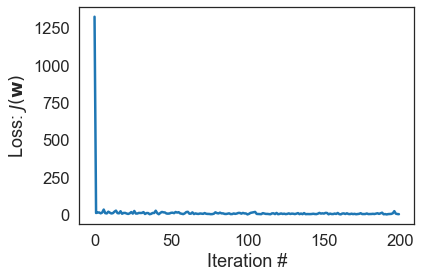

In [61]:
plot_learning_curves(err_all)

<h2 style="font-family: Courier New">STOCHASTIC GRADIENT DESCENT</h2>

In [62]:
def sgd(X,y,num_epochs):
    w_all=[]
    err_all=[]
    w=np.zeros((X.shape[1]))
    for epoch in range(num_epochs):
        for i in range(X.shape[0]):
            random_index=np.random.randint(X.shape[0])
            xi=X[random_index:random_index+1]
            yi=y[random_index:random_index+1]
            err_all.append(Loss(xi,yi,w))
            gradients=2*calc_gradient(xi,yi,w)
            lr=learning_schedule(epoch*X.shape[0]+i)
            w=update_weights(w,gradients,lr)
            w_all.append(w)
    return w,err_all,w_all

In [63]:
weight,err_all,weights_all=sgd(X_train,y_train,10)

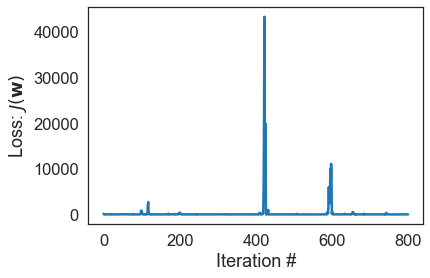

In [64]:
plot_learning_curves(err_all)

<h2 style="font-family: Courier New">COMBINING COMPONENTS </h2>

In [65]:
class MyLinearReg:
    def __init__(self):
        self.t0=200
        self.t1=1000
    def fit(self,X,y):
        self.w=np.linalg.pinv(X)@y
    def calculategradient(self,X,y):
        return X.T@(self.predict(X)-y)
    def weight_update(self,X,y,grad,lr):
        return self.w-lr*grad
    def predict(self,X):
        return X@self.w
    def loss(self,X,y):
        y_pred=self.predict(X)
        e=y_pred-y
        return (1/2)*(e.T@e)
    def rmse(self,X,y):
        return np.sqrtr(2/X.shape[0]*self.loss(X,y))
    def gradient_descent(self,X,y,num_epochs=100,lr=1e-3):
        err_all=[]
        w_all=[]
        if y.ndim==1:
            self.w=np.zeros((X.shape[1],))
        else:
            self.w=np.zeros((X.shape[1],y.shape[1]))
        for epoch in range(num_epochs):
            grad=self.calculategradient(X,y)
            self.w=self.weight_update(X,y,grad,lr)
            err_all.append(self.loss(X,y))
            w_all.append(self.w)
        self.w_all=w_all
        self.err_all=err_all
        return self.w
    def learning_schedule(self,t):
        return self.t0/(self.t1+t)
    def mbgd(self,X,y,minibatch_size,num_epochs):
        t=0
        err_all=[]
        w_all=[]
        if y.ndim==1:
            self.w=np.zeros((X.shape[1],))
        else:
            self.w=np.zeros((X.shape[1],y.shape[1]))
        for epoch in range(num_epochs):
            shuffled_indices=np.random.permutation(X.shape[0])
            X_shuffled=X[shuffled_indices]
            y_shuffled=y[shuffled_indices]
            for i in range(0,X.shape[0],minibatch_size):
                t+=1
                xi=X_shuffled[i:i+minibatch_size]
                yi=y_shuffled[i:i+minibatch_size]
                err_all.append(self.loss(xi,yi))
                gradients=2/minibatch_size*self.calculategradient(xi,yi)
                lr=self.learning_schedule(t)

                self.w=self.weight_update(X,y,gradients,lr)
                w_all.append(self.w)
        self.w_all=w_all
        self.err_all=err_all
        return self.w
    def sgd(self,X,y,num_epochs):
        lr=0
        err_all=[]
        w_all=[]
        if y.ndim==1:
            self.w=np.zeros((X.shape[1],))
        else:
            self.w=np.zeros((X.shape[1],y.shape[1]))
        for epoch in range(num_epochs):
            for i in range(X.shape[0]):
                random_idx=np.random.randint(X.shape[0])
                X_=X[random_idx:random_idx+1]
                y_=y[random_idx:random_idx+1]
                err_all.append(self.loss(X_,y_))
                gradients=2*self.calculategradient(X_,y_)
                lr=self.learning_schedule(epoch*X.shape[0]+i)
                self.w=self.weight_update(X,y,gradients,lr)
                w_all.append(self.w)
        self.w_all=w_all
        self.err_all=err_all
        return self.w

In [66]:
# CREATE A CLASS COMBINING ALL THE FUNCTIONS
import unittest

# class TestCalculateGradient(unittest.TestCase):
#     def test_calculate_gradient(self):
#         feature_matrix=np.array([[1,3,2,5],[1,9,4,7]])
#         weight_vector=np.array([1,1,1,1])
#         label_vector=np.array([6,11])
#         expected_grad=np.array([15,105,50,95])
        
#         grad=calc_gradient(feature_matrix,label_vector,weight_vector)
#         self.assertEqual(grad.shape,(4,))
#         np.testing.assert_array_almost_equal(expected_grad,grad,decimal=0)
# # unittest.main(argv=[''],defaultTest='TestCalculateGradient',verbosity=2,exit=False)

# class TestLossFunction(unittest.TestCase):
#     def test_loss_function(self):
#         feature_matrix=np.array([[1,3,2,5],[1,9,4,7]])
#         weight_vector=np.array([1,1,1,1])
#         label_vector=np.array([6,11])
#         expected_loss=np.array([62.5])
#         loss_value=loss(feature_matrix,label_vector,weight_vector)
#         self.assertEqual(loss_value.shape,())
#         np.testing.assert_array_equal(expected_loss,loss_value)
    
# class TestUpdateWeights(unittest.TestCase):
#     def test_update_weights(self):
#         weight_vector=np.array([1,1,1,1])
#         grad_vector=np.array([15,105,50,95])
#         lr=0.001
#         expected_w_new=np.array([0.985,0.895,0.95,0.905])
#         w_new=update_weights(weight_vector,grad_vector,lr)
#         self.assertEqual(expected_w_new.shape,(4,))
        
#         np.testing.assert_array_almost_equal(expected_w_new,w_new,decimal=1)
# # unittest.main(argv=[''],defaultTest='TestUpdateWeights',verbosity=2,exit=False)
# class TestNormalEquation(unittest.TestCase):
#     def test_normal_equation(self):
#         feature_matrix=X_train
#         label_vector=y_train
#         expected_weight=np.array([4.,3.])
#         estimated_weight_vector=normal_equation(feature_matrix,label_vector)
#         self.assertEqual(estimated_weight_vector.shape,(2,))
#         np.testing.assert_array_almost_equal(estimated_weight_vector,expected_weight,decimal=0)
# #unittest.main(argv=[''],defaultTest='TestNormalEquation',verbosity=2,exit=False)

def generate_data(n=100,w0=4,w1=3):
       
        X=10*np.random.rand(n,)
        y=w0+w1*X+np.random.randn(n,)
        # self.w=np.array([w0,w1])
        return X,y

def add_dummy_feature(x):
    # Adds the 1 1 1.. in each row for x0 value.
    return np.column_stack((np.ones(x.shape[0]),x))

def preprocess(X,y,size=0.20):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=42)
    X_train=add_dummy_feature(X_train)
    X_test=add_dummy_feature(X_test)
    return X_train,X_test,y_train,y_test

class LinearRegression():
    def __init__(self):
        self.t0=200
        self.t1=1000
        
    
    def Predict(self,X:np.ndarray)->np.ndarray:
        '''
        Prediction of output label from the given Feature matrix and weight matrix
        Args:
            X: Feature matrix
        Returns:
            y: Output label vector predicted by the model
        '''
#         assert X.shape[-1]==self.w.shape[0],"X and w don't have compatible dimensions"
        return (X @ self.w)

    def non_vectorized_predict(self,X):
        '''
        Non-vectorized version of the predict function above.
        Prediction of output label from the given Feature matrix and weight matrix
        Args:
            X: Feature matrix
        Returns:
            y: Output label vector predicted by the model
        '''
        y=[]
        for i in range(0,X.shape[0]):
            y_hat_i=0
            for j in range(0,X.shape[1]):
                y_hat_i+=X[i][j]*self.w[j]
            y.append(y_hat_i)
        return np.array(y) 

    def loss(self,X:np.ndarray,y:np.ndarray)->float:
        '''
        Calculation of loss obtained for the built model
        Args:
            X: Feature matrix as numpy array
            y: Label vector as numpy array
        Returns:
            Loss: float
        '''
        e=y-self.Predict(X)
        return (1/2)*(np.transpose(e)@e)
    def rmse(self,X:np.ndarray, y:np.ndarray)->float:
        '''
        Calculates root mean squared error of prediction w.r.t actual label
        Args:
            X: Feature matrix
            y: Output label vector
        Returns:
            Loss
        '''
        return np.sqrt((2/X.shape[0])*self.loss(X,y))
    def fit(self,X:np.ndarray,y:np.ndarray)->np.ndarray:
        '''
        Estimates the parameters of linear regression with normal equation
        Args:
            X: Feature matrix
            y: Label vector predicted by the model
        Returns:
            Weight vector
        '''
        self.w=np.linalg.pinv(X)@y
        return self.w

    def calc_gradient(self,X:np.ndarray,y:np.ndarray)->np.ndarray:
        '''
        Gradient calculation of loss function
        Args:
            X: Feature matrix for training data
            y: Label vector for training data
        Returns:
            A vector of gradients
        '''
        return np.transpose(X)@(self.Predict(X)-y)
    def update_weights(self,grad:np.ndarray,lr:float)->np.ndarray:
        '''
        Updates the weights based on the gradient of loss function
        Update:
            W_new : = W_old - lr*gradient

        Args:
            grad: gradient of loss w.r.t w
            lr: learning rate
        Returns:
            Updated weight vector
        '''
        return (self.w-(lr*grad))

    def  learning_schedule(self,t):
        '''
        Calculates learning rate
        '''
        return self.t0/(self.t1+t)

    def gradient_descent_iterative(self,X:np.ndarray,y:np.ndarray,num_epochs: int,lr=0.00001):
        '''
        Estimates parameters by using the Batch Gradient Descent. This function is iterative
        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps
            lr: Learning rate
        Returns:
            Weight vector: Final weight vector
        '''

        self.w=np.zeros((X.shape[1],))
        self.w_all=[]
        self.err_all=[]
        epsilon=3.5
        iter_count=0
        while self.loss(X,y)>epsilon:
            err=self.loss(X,y)
            self.err_all.append(err)
            self.w_all.append(self.w)
            grad=np.transpose(X)@(self.Predict(X)-y)
            # WEIGHT UPDATE

            self.update_weights()
            if iter_count%100==0:
                print(f"Iteration #: {iter_count}, Loss : {err}, weights: {w_pred}")
            iter_count+=1
        return errors,weights,w_pred,iter_count
    def gradient_descent(self,X:np.ndarray,y:np.ndarray,lr:float,num_epochs:int)->np.ndarray:
        '''
            Estimates parameters by using the Batch Gradient Descent. This function is iterative
            Args:
                X: Feature matrix for training data
                y: Label vector for training data
                num_epochs: Number of training steps
                lr: Learning rate
            Returns:
                Weight vector: Final weight vector
            '''
        #X=np.column_stack((np.ones(X.shape[0]),X))
        self.w_all=[]
        self.err_all=[]
        self.w=np.zeros((X.shape[1],))
        #print()
        for i in np.arange(0,num_epochs+1):
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X,y))
            dJdW=self.calc_gradient(X,y)
            self.w=self.update_weights(dJdW,lr)
            if i%100==0:
                print("Iteration #:%d, loss:%4.2f"%(i,self.err_all[-1]),end=' ')
                print("weights",self.w)
        return self.w
    def sgd(self,X:np.ndarray,y:np.ndarray,num_epochs:int)->np.ndarray:
        '''
        Estimates parameters by using the Stochastic Gradient Descent. This function is iterative
        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps

        Returns:
            Weight vector: Final weight vector
        '''
        self.w_all=[]
        self.err_all=[]
        self.w=np.zeros((X.shape[1]))
        for epoch in range(num_epochs):
            for i in range(X.shape[0]):
                random_index=np.random.randint(X.shape[0])
                xi=X[random_index:random_index+1]
                yi=y[random_index:random_index+1]
                self.err_all.append(self.loss(xi,yi))
                gradients=2*self.calc_gradient(xi,yi)
                lr=self.learning_schedule(epoch*X.shape[0]+i)
                self.w=self.update_weights(gradients,lr)
                self.w_all.append(self.w)
        return self.w
    def mbgd(self,X:np.ndarray,y:np.ndarray,num_iters: int,minibatch_size:int)->np.ndarray:
        
        '''
        Estimates parameters by using the Mini-Batch Gradient Descent. This function is iterative
        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps
        Returns:
            Weight vector: Final weight vector
        '''
        self.w_all=[]
        self.err_all=[]
        self.w=np.zeros((X.shape[1]))
        t=0
        for epoch in range(num_iters):
            shuffled_indices=np.random.permutation(X.shape[0])
            X_shuffled=X[shuffled_indices]
            y_shuffled=y[shuffled_indices]
            for i in range(0,X.shape[0],minibatch_size):
                t+=1
                xi=X_shuffled[i:i+minibatch_size]
                yi=y_shuffled[i:i+minibatch_size]
                self.err_all.append(self.loss(xi,yi))
                gradients=2/minibatch_size*self.calc_gradient(xi,yi)
                lr=self.learning_schedule(t)
                
                self.w=self.update_weights(gradients,lr)
                self.w_all.append(self.w)
        return self.w

#unittest.main(argv=[''],defaultTest='TestLossFunction',verbosity=2,exit=False)

In [67]:
X,y=generate_data()
X_train,X_test,y_train,y_test=preprocess(X,y)

In [68]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

array([3.98298904, 3.00967179])

In [69]:
linreg1=MyLinearReg()
linreg1.fit(X_train,y_train)

In [70]:
linreg1.w

array([3.98298904, 3.00967179])

In [71]:
linreg.gradient_descent(X_train,y_train,num_epochs=40000,lr=0.00001)
print(linreg.w)

Iteration #:0, loss:18360.55 weights [0.01548578 0.1012496 ]
Iteration #:100, loss:213.07 weights [0.55671315 3.32215035]
Iteration #:200, loss:156.03 weights [0.65070036 3.48548196]
Iteration #:300, loss:151.25 weights [0.71938035 3.48496637]
Iteration #:400, loss:146.80 weights [0.78541634 3.47584791]
Iteration #:500, loss:142.54 weights [0.85005022 3.46645165]
Iteration #:600, loss:138.44 weights [0.9133741  3.45722052]
Iteration #:700, loss:134.51 weights [0.97541786 3.44817464]
Iteration #:800, loss:130.73 weights [1.03620757 3.43931152]
Iteration #:900, loss:127.11 weights [1.09576859 3.43062755]
Iteration #:1000, loss:123.63 weights [1.15412574 3.42211909]
Iteration #:1100, loss:120.29 weights [1.21130337 3.41378262]
Iteration #:1200, loss:117.08 weights [1.26732531 3.40561464]
Iteration #:1300, loss:114.01 weights [1.32221492 3.39761175]
Iteration #:1400, loss:111.05 weights [1.37599509 3.38977062]
Iteration #:1500, loss:108.21 weights [1.42868824 3.38208797]
Iteration #:1600, 

Iteration #:16200, loss:40.33 weights [3.8560257 3.028183 ]
Iteration #:16300, loss:40.33 weights [3.85859191 3.02780885]
Iteration #:16400, loss:40.32 weights [3.86110625 3.02744226]
Iteration #:16500, loss:40.31 weights [3.86356977 3.02708308]
Iteration #:16600, loss:40.31 weights [3.8659835  3.02673116]
Iteration #:16700, loss:40.30 weights [3.86834845 3.02638635]
Iteration #:16800, loss:40.30 weights [3.87066559 3.02604851]
Iteration #:16900, loss:40.29 weights [3.87293589 3.0257175 ]
Iteration #:17000, loss:40.29 weights [3.87516031 3.02539318]
Iteration #:17100, loss:40.28 weights [3.87733977 3.02507542]
Iteration #:17200, loss:40.28 weights [3.87947518 3.02476408]
Iteration #:17300, loss:40.27 weights [3.88156742 3.02445903]
Iteration #:17400, loss:40.27 weights [3.88361738 3.02416014]
Iteration #:17500, loss:40.26 weights [3.8856259 3.0238673]
Iteration #:17600, loss:40.26 weights [3.88759383 3.02358038]
Iteration #:17700, loss:40.26 weights [3.88952198 3.02329926]
Iteration #:

Iteration #:30300, loss:40.17 weights [3.9758557  3.01071183]
Iteration #:30400, loss:40.17 weights [3.97599988 3.01069081]
Iteration #:30500, loss:40.17 weights [3.97614115 3.01067021]
Iteration #:30600, loss:40.17 weights [3.97627956 3.01065003]
Iteration #:30700, loss:40.17 weights [3.97641518 3.01063026]
Iteration #:30800, loss:40.17 weights [3.97654805 3.01061088]
Iteration #:30900, loss:40.17 weights [3.97667823 3.0105919 ]
Iteration #:31000, loss:40.17 weights [3.97680579 3.01057331]
Iteration #:31100, loss:40.16 weights [3.97693077 3.01055508]
Iteration #:31200, loss:40.16 weights [3.97705322 3.01053723]
Iteration #:31300, loss:40.16 weights [3.97717319 3.01051974]
Iteration #:31400, loss:40.16 weights [3.97729075 3.0105026 ]
Iteration #:31500, loss:40.16 weights [3.97740592 3.01048581]
Iteration #:31600, loss:40.16 weights [3.97751877 3.01046935]
Iteration #:31700, loss:40.16 weights [3.97762933 3.01045323]
Iteration #:31800, loss:40.16 weights [3.97773767 3.01043744]
Iteratio

In [72]:
X_train.shape,linreg1.w.shape

((80, 2), (2,))

In [73]:
linreg1.gradient_descent(X_train,y_train,num_epochs=40000,lr=0.00001)
print(linreg1.w)

[3.9820046  3.00981532]


In [74]:
linreg.mbgd(X_train,y_train,num_iters=1,minibatch_size=70)

array([ -6.79950035, -56.08925246])

In [75]:
linreg1.mbgd(X_train,y_train,num_epochs=1,minibatch_size=70)

array([ -3.57906379, -14.80235235])

In [76]:
from sklearn.datasets import make_regression
X,y,coef=make_regression(n_samples=200,n_features=10,n_informative=10,n_targets=1,shuffle=True
                        ,coef=True,noise=0.5,random_state=0)


In [77]:
X.shape,y.shape,coef.shape

((200, 10), (200,), (10,))

In [78]:
print("Weight used for data generation",coef)

Weight used for data generation [40.05104636 10.32532207 51.90989393  6.18447832 41.09157343 28.46940664
 88.97621358  9.68032193 15.48694157 44.96944303]


In [79]:
X_train,X_test,y_train,y_test=preprocess(X,y)

In [80]:
linreg.fit(X_train,y_train)
print(linreg.w)

[4.30868690e-03 4.00335228e+01 1.03086790e+01 5.19091277e+01
 6.29286567e+00 4.11625781e+01 2.84422862e+01 8.89543306e+01
 9.75752481e+00 1.54723974e+01 4.49980952e+01]


In [81]:
np.testing.assert_almost_equal(coef,linreg.w[1:],decimal=0)

In [82]:
linreg.gradient_descent(X_train,y_train,num_epochs=1000,lr=1e-4)
print("Weight through gradient descent",linreg.w)

Iteration #:0, loss:1357483.15 weights [-0.02534057  0.64585153  0.20339313  1.00915607 -0.10369119  0.53494962
  0.41235305  1.35895577  0.2104315   0.12580256  0.73726364]
Iteration #:100, loss:59260.90 weights [-0.43103515 32.14865341  8.31196834 44.81462416  0.48578576 29.98867362
 22.33831802 69.89340465  9.50660528  9.6307053  35.7667444 ]
Iteration #:200, loss:3348.52 weights [-0.15898535 38.42309709  9.53481069 50.96552036  3.91153181 37.93145789
 27.20960332 84.71618269 10.39428733 13.54422489 42.73548723]
Iteration #:300, loss:257.98 weights [-4.99638749e-02  3.97055534e+01  9.95643217e+00  5.18065065e+01
  5.45243564e+00  4.01712847e+01  2.81997236e+01  8.80000901e+01
  1.01559660e+01  1.48679252e+01  4.43648319e+01]
Iteration #:400, loss:41.27 weights [-1.49539919e-02  3.99687545e+01  1.01556292e+01  5.19088865e+01
  6.00910948e+00  4.08416127e+01  2.83936958e+01  8.87385008e+01
  9.94112457e+00  1.52868461e+01  4.48034235e+01]
Iteration #:500, loss:22.36 weights [-3.092165

In [83]:
linreg1.gradient_descent(X_train,y_train,num_epochs=1000,lr=1e-4)
print("Weight through gradient descent",linreg1.w)

Weight through gradient descent [4.23513204e-03 4.00335497e+01 1.03081869e+01 5.19092201e+01
 6.29241093e+00 4.11619488e+01 2.84422549e+01 8.89543222e+01
 9.75811687e+00 1.54722408e+01 4.49977615e+01]


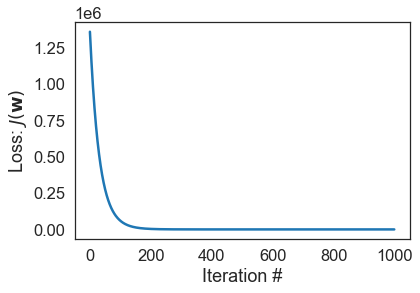

In [84]:
plot_learning_curves(linreg.err_all[:1000])

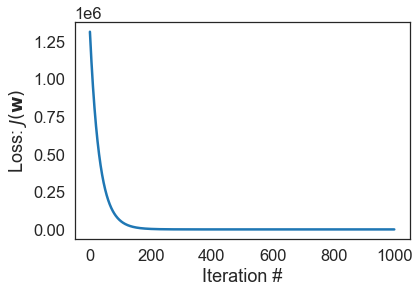

In [85]:
plot_learning_curves(linreg1.err_all[:1000])

In [86]:
np.testing.assert_almost_equal(coef,linreg.w[1:],decimal=1)

In [87]:
linreg.mbgd(X_train,y_train,num_iters=100,minibatch_size=16)

array([4.90309509e-03, 3.99936186e+01, 1.03062520e+01, 5.19007232e+01,
       6.28906281e+00, 4.11877312e+01, 2.84669765e+01, 8.89677911e+01,
       9.76929078e+00, 1.54991218e+01, 4.50219807e+01])

In [88]:
linreg1.mbgd(X_train,y_train,num_epochs=100,minibatch_size=16)

array([2.53672117e-02, 4.00159098e+01, 1.03153477e+01, 5.18926413e+01,
       6.26283463e+00, 4.11353862e+01, 2.84241394e+01, 8.89600179e+01,
       9.72727447e+00, 1.54736670e+01, 4.49977579e+01])

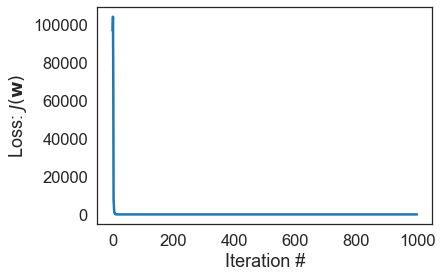

In [89]:
plot_learning_curves(linreg.err_all)

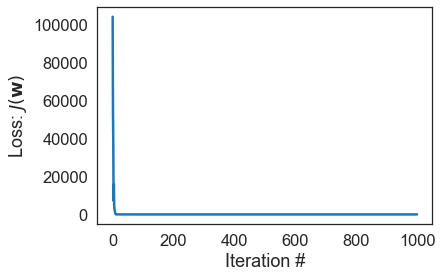

In [90]:
plot_learning_curves(linreg1.err_all)

In [91]:
linreg.sgd(X_train,y_train,num_epochs=100)

array([-4.52660708e-02,  3.99692102e+01,  1.03281740e+01,  5.19396763e+01,
        6.29898244e+00,  4.12268895e+01,  2.83491079e+01,  8.88595683e+01,
        9.75873959e+00,  1.54372761e+01,  4.50068359e+01])

In [92]:
linreg1.sgd(X_train,y_train,num_epochs=100)

array([1.28818060e-02, 3.99829698e+01, 1.03420634e+01, 5.19482388e+01,
       6.32587866e+00, 4.12067065e+01, 2.83166507e+01, 8.89051782e+01,
       9.77592987e+00, 1.54454114e+01, 4.50095543e+01])

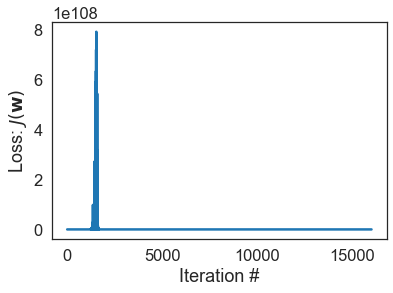

In [93]:
plot_learning_curves(linreg.err_all)

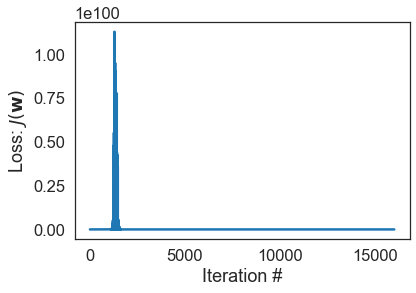

In [94]:
plot_learning_curves(linreg1.err_all)

<h2 style="font-family: Courier New">Polynomial Regression </h2>

In [17]:
import itertools
import functools

def get_combinations(x,degree):
    return itertools.combinations_with_replacement(x,degree)

def compute_new_feature(items):
    return functools.reduce(lambda x,y:x*y,items)

import numpy as np
import itertools
import functools

def polynomial_transform(x,degree,logging=False):
    if x.ndim==1:
        x=x[:,None]
    x_t=x.transpose()
    features=[np.ones(len(x))]
    if logging:
        print("INPUT:",x)
    for degree in range(1,degree+1):
        for items in itertools.combinations_with_replacement(x,degree):
            features.append(functools.reduce(lambda x,y:x*y,items))
#             if logging:
#                 print(items,":",compute_new_feature(items))
#     if logging:
#         print(np.asarray(features).transpose())
    return np.asarray(features).transpose()

In [18]:
{items:compute_new_feature(items) for items in get_combinations([1,2,3,4,5],4)}

{(1, 1, 1, 1): 1,
 (1, 1, 1, 2): 2,
 (1, 1, 1, 3): 3,
 (1, 1, 1, 4): 4,
 (1, 1, 1, 5): 5,
 (1, 1, 2, 2): 4,
 (1, 1, 2, 3): 6,
 (1, 1, 2, 4): 8,
 (1, 1, 2, 5): 10,
 (1, 1, 3, 3): 9,
 (1, 1, 3, 4): 12,
 (1, 1, 3, 5): 15,
 (1, 1, 4, 4): 16,
 (1, 1, 4, 5): 20,
 (1, 1, 5, 5): 25,
 (1, 2, 2, 2): 8,
 (1, 2, 2, 3): 12,
 (1, 2, 2, 4): 16,
 (1, 2, 2, 5): 20,
 (1, 2, 3, 3): 18,
 (1, 2, 3, 4): 24,
 (1, 2, 3, 5): 30,
 (1, 2, 4, 4): 32,
 (1, 2, 4, 5): 40,
 (1, 2, 5, 5): 50,
 (1, 3, 3, 3): 27,
 (1, 3, 3, 4): 36,
 (1, 3, 3, 5): 45,
 (1, 3, 4, 4): 48,
 (1, 3, 4, 5): 60,
 (1, 3, 5, 5): 75,
 (1, 4, 4, 4): 64,
 (1, 4, 4, 5): 80,
 (1, 4, 5, 5): 100,
 (1, 5, 5, 5): 125,
 (2, 2, 2, 2): 16,
 (2, 2, 2, 3): 24,
 (2, 2, 2, 4): 32,
 (2, 2, 2, 5): 40,
 (2, 2, 3, 3): 36,
 (2, 2, 3, 4): 48,
 (2, 2, 3, 5): 60,
 (2, 2, 4, 4): 64,
 (2, 2, 4, 5): 80,
 (2, 2, 5, 5): 100,
 (2, 3, 3, 3): 54,
 (2, 3, 3, 4): 72,
 (2, 3, 3, 5): 90,
 (2, 3, 4, 4): 96,
 (2, 3, 4, 5): 120,
 (2, 3, 5, 5): 150,
 (2, 4, 4, 4): 128,
 (2, 4, 4, 5): 1

In [97]:
{items:compute_new_feature(items) for items in get_combinations([1],3)}

{(1, 1, 1): 1}

In [98]:
{items:compute_new_feature(items) for items in get_combinations([2,3],3)}

{(2, 2, 2): 8, (2, 2, 3): 12, (2, 3, 3): 18, (3, 3, 3): 27}

In [99]:
{items:compute_new_feature(items) for items in get_combinations([1,4],4)}

{(1, 1, 1, 1): 1,
 (1, 1, 1, 4): 4,
 (1, 1, 4, 4): 16,
 (1, 4, 4, 4): 64,
 (4, 4, 4, 4): 256}

In [100]:
a=polynomial_transform(np.array([[1,2,3,4,5]]),4,logging=False)

C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [101]:
a.shape

(5,)

In [102]:
polynomial_transform(np.array([2]),5,logging=True)

INPUT: [[2]]


array([[ 1.,  2.,  4.,  8., 16., 32.]])

In [103]:
polynomial_transform(np.array([2]),5,logging=True)

INPUT: [[2]]


array([[ 1.,  2.,  4.,  8., 16., 32.]])

In [104]:
polynomial_transform(np.array([[5,4]]),2,logging=True)

INPUT: [[5 4]]


array([array([1.]), array([5, 4]), array([25, 16])], dtype=object)

In [105]:
polynomial_transform(np.array([[2,3],[4,5]]),2,logging=True).shape

INPUT: [[2 3]
 [4 5]]


(2, 6)

In [106]:
polynomial_transform(np.array([[2,3],[4,5]]),3,logging=True).shape

INPUT: [[2 3]
 [4 5]]


(2, 10)

In [107]:
polynomial_transform(np.array([2]),degree=0)

array([[1.]])

<h4 style="font-family: Courier New"> Non Linear Training data generation </h4>

In [108]:
def create_nonlin_training_set(func,sample_size,std):
    x=np.linspace(0,1,sample_size)
    y=func(x)+np.random.normal(scale=std,size=x.shape)
    return x,y
def nonlin(x):
    return np.sin(2*np.pi*x)

In [109]:
# @title [Visualization]
def visualize_training_data(X_train,y_train):
    points=np.linspace(0,1,100)
    output=nonlin(points)
    plt.scatter(X_train,y_train,facecolor='none',edgecolor='b',s=50,label='Training data')
    plt.plot(points,output,c='g',label='$\sin(2\pi x)$')
    plt.xlabel('$x_1$')
    plt.ylabel('y')
    plt.legend()
    plt.show()
def visualize_model_fit(X,y,lin_reg,degree):
    points=np.linspace(0,1,100)
    output=nonlin(points)
    if degree>0:
        plt.scatter(X,y,facecolor='none',edgecolor='b',s=50,label='Training data')
    plt.plot(points,output,c='g',label='$\sin(2\pi x)$')
    
    y_hat=lin_reg.Predict(polynomial_transform(points,degree))
    plt.plot(points,y_hat,c='r',label='$h_\mathbf{w}(x)$')
    plt.xlabel('$x_1$')
    plt.ylabel('y')
    plt.ylim(-1.5,1.5)
    plt.title('M={}'.format(degree))
    

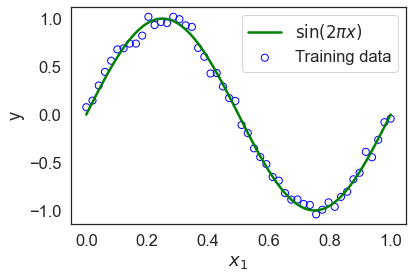

In [110]:
X_t1,y_t1=create_nonlin_training_set(nonlin,50,0.05)
visualize_training_data(X_t1,y_t1)

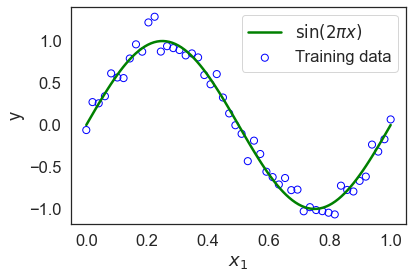

In [111]:
X_X_t1,y_t1=create_nonlin_training_set(nonlin,50,0.1)
visualize_training_data(X_t1,y_t1)

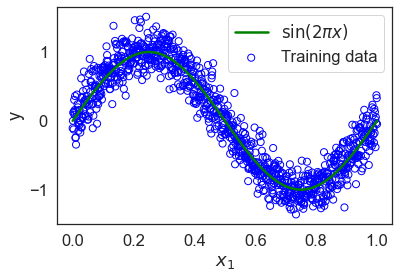

In [112]:
num_samples=1000
X,y=create_nonlin_training_set(nonlin,num_samples,0.2)
visualize_training_data(X,y)

In [113]:
degree=9
X_transform=polynomial_transform(X,degree)
lin_reg=LinearRegression()
lin_reg.fit(X_transform,y)
visualize_model_fit(X,y,lin_reg,degree)

MemoryError: 

In [ ]:
f=plt.figure(figsize=(12,8))
sns.set_context('notebook',font_scale=1.5,rc={'lines.width':2.5})
for i,degree in enumerate([0,1,3,5,7,9]):
    plt.subplot(3,3,i+1)
    X_transform=polynomial_transform(X,degree)
    lin_reg=LinearRegression()
    lin_reg.fit(X_transform,y)
    visualize_model_fit(X,y,lin_reg,degree)
f.tight_layout()
plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)
plt.show()

In [114]:
import pandas as pd

def convert_dict_to_df(w_dict,degree):
    poly_w_dict={i:np.array(np.zeros(degree)) for i in range(degree)}
    for deg in poly_w_dict:
        weight_vec=w_dict[deg]
        for i in range(len(weight_vec)):
            poly_w_dict[deg][i]=weight_vec[i]
    poly_w_df=pd.DataFrame(poly_w_dict)
    poly_w_df.columns=['w_'+str(i) for i in range(degree)]
    return poly_w_df

def plot_model_selection(training_errors,val_errors):
    plt.plot(training_errors,'o-',mfc='none',mec='b',ms=10)
    plt.plot(val_errors,'o-',mfc='none',mec='r',ms=10)
    plt.legend()
    plt.xlabel('degree')
    plt.ylabel('RMSE')
    plt.show()
    

In [115]:
training_errors=[]
val_errors=[]
w_dict={}
X_val=np.linspace(0,1,100)
y_val=nonlin(X_val)
for i in range(10):
    X_transform=polynomial_transform(X,i)
    X_val_transform = polynomial_transform(X_val,i)
    lin_reg=LinearRegression()
    lin_reg.fit(X_transform,y)
    w_dict[i]=lin_reg.w
    training_errors.append(lin_reg.rmse(X_transform,y))
    val_errors.append(lin_reg.rmse(X_val_transform,y_val+np.random.normal(scale=0.25,size=len(y_val))))
plot_model_selection(training_errors,val_errors)
convert_dict_to_df(w_dict,10)

C:\Users\kabali\AppData\Roaming\Python\Python38\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


LinAlgError: 1-dimensional array given. Array must be at least two-dimensional

<p style='font-family: Courier New'>
Observations:
<ul style='font-family: Courier New'>
    <li>Higher order polynomial terms are assigned larger weights. The larger weights are problematic as a small change in 
    the input causes to give large change in the output.</li>
    
</ul>
<p style='font-family: Courier New'>This is the high variance problem or overfitting problem. </p>
<ul style='font-family: Courier New'>
    <li>Can fix this problem with more data. Try running the analysis with number of samples = 100, 1000, 10000 and observe the
        weight vectors for higher order polynomial models.</li>
    <li>Note down which polynomial model is suitable for different samples sizes.</li>
 </ul>
</p>

<h4 style='font-family: Courier New'>Ridge and Lasso Regression </h4>

In [ ]:
# MODIFIED LINEAR REGRESSION WITH REGULARIZATION

def generate_data(n=100,w0=4,w1=3):
       
        X=10*np.random.rand(n,)
        y=w0+w1*X+np.random.randn(n,)
        # self.w=np.array([w0,w1])
        return X,y

def add_dummy_feature(x):
    # Adds the 1 1 1.. in each row for x0 value.
    return np.column_stack((np.ones(x.shape[0]),x))

def preprocess(X,y,size=0.20):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=42)
    X_train=add_dummy_feature(X_train)
    X_test=add_dummy_feature(X_test)
    return X_train,X_test,y_train,y_test

class LinReg():
    def __init__(self):
        self.t0=200
        self.t1=1000
        
    
    def Predict(self,X:np.ndarray)->np.ndarray:
        '''
        Prediction of output label from the given Feature matrix and weight matrix
        Args:
            X: Feature matrix
        Returns:
            y: Output label vector predicted by the model
        '''
#         assert X.shape[-1]==self.w.shape[0],"X and w don't have compatible dimensions"
        return (X @ self.w)

    def non_vectorized_predict(self,X):
        '''
        Non-vectorized version of the predict function above.
        Prediction of output label from the given Feature matrix and weight matrix
        Args:
            X: Feature matrix
        Returns:
            y: Output label vector predicted by the model
        '''
        y=[]
        for i in range(0,X.shape[0]):
            y_hat_i=0
            for j in range(0,X.shape[1]):
                y_hat_i+=X[i][j]*self.w[j]
            y.append(y_hat_i)
        return np.array(y) 

    def loss(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->float:
        '''
        Calculation of loss obtained for the built model
        Args:
            X: Feature matrix as numpy array
            y: Label vector as numpy array
        Returns:
            Loss: float
        '''
        e=y-self.Predict(X)
        return (1/2)*(np.transpose(e)@e) + (reg_rate/2)*(np.transpose(self.w)@np.transpose(self.w))
    def rmse(self,X:np.ndarray, y:np.ndarray,reg_rate:float)->float:
        '''
        Calculates root mean squared error of prediction w.r.t actual label
        Args:
            X: Feature matrix
            y: Output label vector
        Returns:
            Loss
        '''
        return np.sqrt((2/X.shape[0])*self.loss(X,y,reg_rate))
    def fit(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->np.ndarray:
        '''
        Estimates the parameters of linear regression with normal equation
        Args:
            X: Feature matrix
            y: Label vector predicted by the model
        Returns:
            Weight vector
        '''
        self.w=np.zeros((X.shape[1]))
        eye=np.eye(np.size(X,1))
        self.w=np.linalg.solve(X.T@X+reg_rate*eye,X.T@y)
        return self.w

    def calc_gradient(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->np.ndarray:
        '''
        Gradient calculation of loss function
        Args:
            X: Feature matrix for training data
            y: Label vector for training data
        Returns:
            A vector of gradients
        '''
        return np.transpose(X)@(self.Predict(X)-y)+reg_rate*self.w
    def update_weights(self,grad:np.ndarray,lr:float)->np.ndarray:
        '''
        Updates the weights based on the gradient of loss function
        Update:
            W_new : = W_old - lr*gradient

        Args:
            grad: gradient of loss w.r.t w
            lr: learning rate
        Returns:
            Updated weight vector
        '''
        return (self.w-(lr*grad))

    def  learning_schedule(self,t):
        '''
        Calculates learning rate
        '''
        return self.t0/(self.t1+t)

    def gradient_descent_iterative(self,X:np.ndarray,y:np.ndarray,num_epochs: int,lr=0.00001):
        '''
        Estimates parameters by using the Batch Gradient Descent. This function is iterative
        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps
            lr: Learning rate
        Returns:
            Weight vector: Final weight vector
        '''

        self.w=np.zeros((X.shape[1],))
        self.w_all=[]
        self.err_all=[]
        epsilon=3.5
        iter_count=0
        while self.loss(X,y)>epsilon:
            err=self.loss(X,y)
            self.err_all.append(err)
            self.w_all.append(self.w)
            grad=np.transpose(X)@(self.Predict(X)-y)
            # WEIGHT UPDATE

            self.update_weights()
            if iter_count%100==0:
                print(f"Iteration #: {iter_count}, Loss : {err}, weights: {w_pred}")
            iter_count+=1
        return errors,weights,w_pred,iter_count
    def gradient_descent(self,X:np.ndarray,y:np.ndarray,lr:float,num_epochs:int,reg_rate:float)->np.ndarray:
        '''
            Estimates parameters by using the Batch Gradient Descent. This function is iterative
            Args:
                X: Feature matrix for training data
                y: Label vector for training data
                num_epochs: Number of training steps
                lr: Learning rate
            Returns:
                Weight vector: Final weight vector
            '''
        #X=np.column_stack((np.ones(X.shape[0]),X))
        self.w_all=[]
        self.err_all=[]
        self.w=np.zeros((X.shape[1],))
        #print()
        for i in np.arange(0,num_epochs+1):
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X,y,reg_rate))
            dJdW=self.calc_gradient(X,y,reg_rate)
            self.w=self.update_weights(dJdW,lr)
            if i%100==0:
                print("Iteration #:%d, loss:%4.2f"%(i,self.err_all[-1]),end=' ')
                print("weights",self.w)
        return self.w
    def sgd(self,X:np.ndarray,y:np.ndarray,num_epochs:int)->np.ndarray:
        '''
        Estimates parameters by using the Stochastic Gradient Descent. This function is iterative
        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps

        Returns:
            Weight vector: Final weight vector
        '''
        self.w_all=[]
        self.err_all=[]
        self.w=np.zeros((X.shape[1]))
        for epoch in range(num_epochs):
            for i in range(X.shape[0]):
                random_index=np.random.randint(X.shape[0])
                xi=X[random_index:random_index+1]
                yi=y[random_index:random_index+1]
                self.err_all.append(self.loss(xi,yi))
                gradients=2*self.calc_gradient(xi,yi)
                lr=self.learning_schedule(epoch*X.shape[0]+i)
                self.w=self.update_weights(gradients,lr)
                self.w_all.append(self.w)
        return self.w
    def mbgd(self,X:np.ndarray,y:np.ndarray,num_iters: int,minibatch_size:int)->np.ndarray:
        
        '''
        Estimates parameters by using the Mini-Batch Gradient Descent. This function is iterative
        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps
            lr: Learning rate
        Returns:
            Weight vector: Final weight vector
        '''
        self.w_all=[]
        self.err_all=[]
        self.w=np.zeros((X.shape[1]))
        t=0
        for epoch in range(num_iters):
            shuffled_indices=np.random.permutation(X.shape[0])
            X_shuffled=X[shuffled_indices]
            y_shuffled=y[shuffled_indices]
            for i in range(0,X.shape[0],minibatch_size):
                t+=1
                xi=X_shuffled[i:i+minibatch_size]
                yi=y_shuffled[i:i+minibatch_size]
                self.err_all.append(self.loss(xi,yi))
                gradients=2/minibatch_size*self.calc_gradient(xi,yi)
                lr=self.learning_schedule(t)
                
                self.w=self.update_weights(gradients,lr)
                self.w_all.append(self.w)
        return self.w

#unittest.main(argv=[''],defaultTest='TestLossFunction',verbosity=2,exit=False)

In [ ]:
linreg=LinReg()
feature_matrix=np.array([[1,2,3],[3,2,4]])
label_vector=np.array([2,4])
weight_vector=np.array([0.1,-0.2,0.3])
linreg.w=weight_vector
print(linreg.loss(feature_matrix,label_vector,0.1))

In [ ]:
linreg=LinReg()
linreg.w=np.array([ 0.5, -0.5])
feature_matrix=np.array([[ 1.1, 1.2],
       [2.3, 1.5],
       [ 2.9, 2.3]])
labels=np.array([1. , 0.6, 1.2])
print(linreg.loss(feature_matrix,labels,0.01))

In [ ]:
linreg=LinReg()
feature_matrix=np.array([[1,3,2,5],[1,9,4,7]])
weight_vector=np.array([1,1,1,1])
label_vector=np.array([6,11])
reg_rate=0.01
expected_loss=np.array([62.52])
linreg.w=weight_vector
loss_value=linreg.loss(feature_matrix,label_vector,reg_rate)


In [ ]:
#ridge regresion for fixing overfitting in polynomial regression

In [ ]:
num_samples=50
X,y=create_nonlin_training_set(nonlin,num_samples,0.2)
visualize_training_data(X,y)


In [ ]:
# @title [Visualization]
def visualize_training_data(X_train,y_train):
    points=np.linspace(0,1,100)
    output=nonlin(points)
    plt.scatter(X_train,y_train,facecolor='none',edgecolor='b',s=50,label='Training data')
    plt.plot(points,output,c='g',label='$\sin(2\pi x)$')
    plt.xlabel('$x_1$')
    plt.ylabel('y')
    plt.legend()
    plt.show()
def visualize_model_fit1(X,y,lin_reg,degree,reg_rate):
    points=np.linspace(0,1,100)
    output=nonlin(points)
    if degree>0:
        plt.scatter(X,y,facecolor='none',edgecolor='b',s=50,label='Training data')
    plt.plot(points,output,c='g',label='$\sin(2\pi x)$')
    
    y_hat=lin_reg.Predict(polynomial_transform(points,degree))
    plt.plot(points,y_hat,c='r',label='$h_\mathbf{w}(x)$')
    plt.xlabel('$x_1$')
    plt.ylabel('y')
    plt.ylim(-1.5,1.5)
    plt.title('M={},$\lambda = {} $'.format(degree,reg_rate))
    

f=plt.figure(figsize=(12,8))
sns.set_context('notebook',font_scale=1.5,rc={'lines.width':2.5})
for i,degree in enumerate([0,1,3,5,7,8]):
    plt.subplot(3,3,i+1)
    X_transform=polynomial_transform(X,degree)
    lin_reg=LinReg()
    lin_reg.fit(X_transform,y,reg_rate=0.01)
    visualize_model_fit1(X,y,lin_reg,degree,reg_rate=0.01)
f.tight_layout()
plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)
plt.show()

In [ ]:
f=plt.figure(figsize=(12,8))
sns.set_context('notebook',font_scale=1.5,rc={'lines.width':2.5})
for i,degree in enumerate([0,1,3,5,7,8]):
    plt.subplot(3,3,i+1)
    X_transform=polynomial_transform(X,degree)
    lin_reg=LinReg()
    lin_reg.fit(X_transform,y,reg_rate=0.01)
    visualize_model_fit1(X,y,lin_reg,degree,reg_rate=0.01)
f.tight_layout()
plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)
plt.show()

In [ ]:
f=plt.figure(figsize=(12,8))
sns.set_context('notebook',font_scale=1.5,rc={'lines.width':2.5})
degree=9
for i, reg_rate in enumerate([1e-3,1e-2,1e-1,0,1,10]):
    plt.subplot(3,3,i+1)
    X_transform=polynomial_transform(X,degree)
    lin_reg=LinReg()
    lin_reg.fit(X_transform,y,reg_rate)
    visualize_model_fit1(X,y,lin_reg,degree,reg_rate)
f.tight_layout()
plt.legend(bbox_to_anchor=(1.05,0.64),loc=2,borderaxespad=0.)
plt.show()

In [ ]:
def plot_reg_w(w_df):
    ax=plt.gca()
    ax.plot(w_df.T)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])
    plt.xlabel('$\lambda$')
    plt.ylabel('$\mathbf{w}$')
    plt.title('Weights as a function of $\lambda$')
    plt.axis('tight')
    plt.show()
def plot_learning_curve(err_df):
    ax=plt.gca()
    ax.plot(err_df)
    ax.set_xscale('log')
    ax.set_xlim(ax.get_xlim()[::-1])
    plt.xlabel('$\lambda$')
    plt.ylabel('RMSE')
    plt.title('Training and validation losses as a function of $\lambda$')
    plt.axis('tight')
    plt.legend(['training','validation'])
    plt.show()

In [ ]:
#MODEL SELECTION WHILE REGULARIZATION

import pandas as pd
training_errors={}
val_errors={}
w_dict={}
degree=9
X_val=np.linspace(0,1,100)
y_val=nonlin(X_val)

X_transform=polynomial_transform(X,degree)
X_val_transform = polynomial_transform(X_val,degree)

for reg_rate in [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100]:
    lin_reg=LinReg()
    lin_reg.fit(X_transform,y,reg_rate)
    w_dict[reg_rate]=lin_reg.w
    training_errors[reg_rate]=lin_reg.rmse(X_transform,y,reg_rate)
    val_errors[reg_rate]=lin_reg.rmse(X_val_transform,y_val+np.random.normal(scale=0.25,size=len(y_val)),reg_rate)
err_df=pd.DataFrame([training_errors,val_errors]).T
w_df=pd.DataFrame(w_dict)

In [ ]:
w_df

In [ ]:
err_df

In [ ]:
plot_learning_curve(err_df)

In [ ]:
plot_reg_w(w_df)

<h4 style="font-family: Courier New"> Lasso Regression </h4>

In [ ]:
from sklearn.linear_model import Lasso

reg_rate=0.01
lasso=Lasso(alpha=reg_rate)
lasso.fit(X_transform,y)
lin_reg=LinReg()
_ = lin_reg.fit(X_transform,y,0)

In [ ]:
l=Lasso(alpha=0.1)
l.fit(feature_matrix,label_vector)
#l.coef_=np.array([0.01,-0.5,0])
#l.intercept_=1.2

In [ ]:
l.fit(feature_matrix,label_vector)

In [ ]:
l.intercept_

In [ ]:
l.coef_

In [ ]:
l.predict(feature_matrix)

In [ ]:
y_pred=l.predict(feature_matrix)

In [ ]:
y_pred,label_vector

In [ ]:
(1/2)*(1.79**2+3.77**2)

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(label_vector,l.predict(feature_matrix))

In [ ]:
lasso.coef_

In [ ]:
linreg.w

In [ ]:
w_df[0.01]

In [ ]:
#pd.DataFrame({'LinReg':linreg.w,'Ridge':w_df[0.01],'Lasso':lasso.coef_})

In [ ]:
# LASSO CAN BE USED FOR FEATURE SELECTION
#  IF ALL THE FEATURES ARE IMPORTANT RIDGE IS GOOD


In [ ]:
# COMPARE WITH DIFFERENT REGULARIZATION RATES

In [ ]:
import pandas as pd

In [ ]:
#MODEL SELECTION WHILE REGULARIZATION

import pandas as pd


training_errors={}
val_errors={}
w_dict={}
degree=9
X_val=np.linspace(0,1,100)
y_val=nonlin(X_val)

X_transform=polynomial_transform(X,degree)
X_val_transform = polynomial_transform(X_val,degree)

for reg_rate in [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1,1,10,100]:
    lasso=Lasso(alpha=reg_rate)
    lasso.fit(X_transform,y)
    w_dict[reg_rate]=lasso.coef_
    training_errors[reg_rate]=mean_squared_error(y,lasso.predict(X_transform),squared=False)
    val_errors[reg_rate]=mean_squared_error(y_val+np.random.normal(scale=0.25,size=len(y_val)),lasso.predict(X_val_transform),
                                           squared=False)
err_df=pd.DataFrame([training_errors,val_errors]).T
w_df=pd.DataFrame(w_dict)

In [ ]:
plot_learning_curve(err_df)

In [ ]:
plot_reg_w(w_df)

 Ridge solution visualization:
<ol>
    <li>Generate synthetic data</li>
    <li>Obtain weight vector for ridge regression model with 100 different values of lambda = {0.001,....,10} in ascending order </li>
    <li>Set up mesh grid of weight values. Let's call it as W </li>
    <li>For each w in W: </li>
        <ul>
            <li>Compute mean squared error for w. </li>
            <li>Compute ridge regularization or constraint term $w^Tw$ .</li>
        </ul>
     <li>Draw contours for mean squared error and ridge regression constraints </li>
     <li>Draw Path of weight vectors from least mean squared eror value to the least value of ridge constraints </li>
</ol>
    

Everything from the above is same for lasso except for the regularization constraint term
While Ridge solutions give ellipses, lasso solutions are polytype.

<h4 style="font-family: Courier New">Multi-output / Multi-Label Regression </h4>

In [ ]:
from sklearn.datasets import make_regression
X,y,coef=make_regression(n_samples=100,n_features=10,n_informative=10,bias=1,n_targets=5,shuffle=True,
                        coef=True,random_state=42)

In [ ]:
X.shape,y.shape

In [ ]:
X[:5],y[:5]

In [ ]:
coef

In [ ]:
X_train,X_test,y_train,y_test=preprocess(X,y)

In [ ]:
# MODIFIED LINEAR REGRESSION WITH REGULARIZATION

def generate_data(n=100,w0=4,w1=3):
       
        X=10*np.random.rand(n,)
        y=w0+w1*X+np.random.randn(n,)
        # self.w=np.array([w0,w1])
        return X,y

def add_dummy_feature(x):
    # Adds the 1 1 1.. in each row for x0 value.
    return np.column_stack((np.ones(x.shape[0]),x))

def preprocess(X,y,size=0.20):
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=size,random_state=42)
    X_train=add_dummy_feature(X_train)
    X_test=add_dummy_feature(X_test)
    return X_train,X_test,y_train,y_test

class LinRegMulti():
    def __init__(self):
        self.t0=200
        self.t1=1000
        
    
    def Predict(self,X:np.ndarray)->np.ndarray:
        '''
        Prediction of output label from the given Feature matrix and weight matrix
        Args:
            X: Feature matrix
        Returns:
            y: Output label vector predicted by the model
        '''
#         assert X.shape[-1]==self.w.shape[0],"X and w don't have compatible dimensions"
        return (X @ self.w)

    def non_vectorized_predict(self,X):
        '''
        Non-vectorized version of the predict function above.
        Prediction of output label from the given Feature matrix and weight matrix
        Args:
            X: Feature matrix
        Returns:
            y: Output label vector predicted by the model
        '''
        y=[]
        for i in range(0,X.shape[0]):
            y_hat_i=0
            for j in range(0,X.shape[1]):
                y_hat_i+=X[i][j]*self.w[j]
            y.append(y_hat_i)
        return np.array(y) 

    def loss(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->float:
        '''
        Calculation of loss obtained for the built model
        Args:
            X: Feature matrix as numpy array
            y: Label vector as numpy array
        Returns:
            Loss: float
        '''
        e=y-self.Predict(X)
        return (1/2)*(np.transpose(e)@e) + (reg_rate/2)*(np.transpose(self.w)@self.w)
    def rmse(self,X:np.ndarray, y:np.ndarray,reg_rate:float)->float:
        '''
        Calculates root mean squared error of prediction w.r.t actual label
        Args:
            X: Feature matrix
            y: Output label vector
        Returns:
            Loss
        '''
        return np.sqrt((2/X.shape[0])*self.loss(X,y,reg_rate))
    def fit(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->np.ndarray:
        '''
        Estimates the parameters of linear regression with normal equation
        Args:
            X: Feature matrix
            y: Label vector predicted by the model
        Returns:
            Weight vector
        '''
        self.w=np.zeros((X.shape[1],y.shape[1]))
        eye=np.eye(np.size(X,1))
        self.w=np.linalg.solve(X.T@X+reg_rate*eye,X.T@y,)
        return self.w

    def calc_gradient(self,X:np.ndarray,y:np.ndarray,reg_rate:float)->np.ndarray:
        '''
        Gradient calculation of loss function
        Args:
            X: Feature matrix for training data
            y: Label vector for training data
        Returns:
            A vector of gradients
        '''
        return np.transpose(X)@(self.Predict(X)-y)+(reg_rate*self.w)
    def update_weights(self,grad:np.ndarray,lr:float)->np.ndarray:
        '''
        Updates the weights based on the gradient of loss function
        Update:
            W_new : = W_old - lr*gradient

        Args:
            grad: gradient of loss w.r.t w
            lr: learning rate
        Returns:
            Updated weight vector
        '''
        return (self.w-(lr*grad))

    def  learning_schedule(self,t):
        '''
        Calculates learning rate
        '''
        return self.t0/(self.t1+t)

    def gradient_descent_iterative(self,X:np.ndarray,y:np.ndarray,num_epochs: int,lr=0.00001):
        '''
        Estimates parameters by using the Batch Gradient Descent. This function is iterative
        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps
            lr: Learning rate
        Returns:
            Weight vector: Final weight vector
        '''

        self.w=np.zeros((X.shape[1],))
        self.w_all=[]
        self.err_all=[]
        epsilon=3.5
        iter_count=0
        while self.loss(X,y)>epsilon:
            err=self.loss(X,y)
            self.err_all.append(err)
            self.w_all.append(self.w)
            grad=np.transpose(X)@(self.Predict(X)-y)
            # WEIGHT UPDATE

            self.update_weights()
            if iter_count%100==0:
                print(f"Iteration #: {iter_count}, Loss : {err}, weights: {w_pred}")
            iter_count+=1
        return errors,weights,w_pred,iter_count
    def gradient_descent(self,X:np.ndarray,y:np.ndarray,lr:float,num_epochs:int,reg_rate:float)->np.ndarray:
        '''
            Estimates parameters by using the Batch Gradient Descent. This function is iterative
            Args:
                X: Feature matrix for training data
                y: Label vector for training data
                num_epochs: Number of training steps
                lr: Learning rate
            Returns:
                Weight vector: Final weight vector
            '''
        #X=np.column_stack((np.ones(X.shape[0]),X))
        self.w_all=[]
        self.err_all=[]
        self.w=np.zeros((X.shape[1],y.shape[1]))
        #print()
        for i in np.arange(0,num_epochs+1):
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X,y,reg_rate))
            dJdW=self.calc_gradient(X,y,reg_rate)
            self.w=self.update_weights(dJdW,lr)
#             if i%100==0:
#                 print("Iteration #:%d, loss:%4.2f"%(i,self.err_all[-1]),end=' ')
#                 print("weights",self.w)
        return self.w
    def sgd(self,X:np.ndarray,y:np.ndarray,num_epochs:int,reg_rate:float)->np.ndarray:
        '''
        Estimates parameters by using the Stochastic Gradient Descent. This function is iterative
        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps

        Returns:
            Weight vector: Final weight vector
        '''
        self.w_all=[]
        self.err_all=[]
        self.w=np.zeros((X.shape[1],y.shape[1]))
        for epoch in range(num_epochs):
            for i in range(X.shape[0]):
                random_index=np.random.randint(X.shape[0])
                xi=X[random_index:random_index+1]
                yi=y[random_index:random_index+1]
                self.err_all.append(self.loss(xi,yi,reg_rate))
                gradients=2*self.calc_gradient(xi,yi,reg_rate)
                lr=self.learning_schedule(epoch*X.shape[0]+i)
                self.w=self.update_weights(gradients,lr)
                self.w_all.append(self.w)
        return self.w
    def mbgd(self,X:np.ndarray,y:np.ndarray,num_iters: int,minibatch_size:int)->np.ndarray:
        
        '''
        Estimates parameters by using the Mini-Batch Gradient Descent. This function is iterative
        Args:
            X: Feature matrix for training data
            y: Label vector for training data
            num_epochs: Number of training steps
            lr: Learning rate
        Returns:
            Weight vector: Final weight vector
        '''
        self.w_all=[]
        self.err_all=[]
        self.w=np.zeros((X.shape[1]))
        t=0
        for epoch in range(num_iters):
            shuffled_indices=np.random.permutation(X.shape[0])
            X_shuffled=X[shuffled_indices]
            y_shuffled=y[shuffled_indices]
            for i in range(0,X.shape[0],minibatch_size):
                t+=1
                xi=X_shuffled[i:i+minibatch_size]
                yi=y_shuffled[i:i+minibatch_size]
                self.err_all.append(self.loss(xi,yi))
                gradients=2/minibatch_size*self.calc_gradient(xi,yi)
                lr=self.learning_schedule(t)
                
                self.w=self.update_weights(gradients,lr)
                self.w_all.append(self.w)
        return self.w

#unittest.main(argv=[''],defaultTest='TestLossFunction',verbosity=2,exit=False)

In [ ]:
?np.around

In [ ]:
multi=LinRegMulti()
w=multi.fit(X_train,y_train,reg_rate=0.)


In [ ]:
np.testing.assert_almost_equal(w[1:,:],coef,decimal=2)

In [ ]:
w

In [ ]:
X_train.shape

In [ ]:
w.shape

In [ ]:
(X_train@w).shape

In [ ]:
multi.Predict(X_train).shape

In [ ]:
multi.gradient_descent(X_train,y_train,num_epochs=100,lr=0.01,reg_rate=0.)


In [ ]:
multi.sgd(X_train,y_train,num_epochs=1000,reg_rate=0.1)

In [ ]:
# TRY EXERCISES TOLD IN THE LAST LECTURE

In [ ]:
# WEEK 4

In [2]:
def fit(X,y):
    return np.linalg.pinv(X)@y
def predict(X,w):
    z=X@w
    return np.array([1 if z_val >=0 else 0 for z_val in z])

In [3]:
# Adopted from PRML github repository
class LabelTransformer(object):
    '''
    Label encoder decoder
    Attributes
    -------------
    n_classes: int 
    number of classes, K
    '''
    def __init__(self,n_classes:int=None):
        self.n_classes=n_classes
        
    @property
    def n_classes(self):
        return self.__n_classes
    
    @n_classes.setter
    def n_classes(self,K):
        self.__n_classes=K
        self.__encoder=None if K is None else np.eye(K)
    @property
    def encoder(self):
        return self.__encoder
    def encode(self,class_indices:np.ndarray):
        '''
        encode class index into one-of -k code
        Parameters
        --------------
        class_indices: (N,) np.ndarray
            non-negative class index
            elements must be integer in [0,n_classes)
        Returns
        ----------
        (N,K) np.ndarray
            one-of-k encoding of input
        '''
        if self.n_classes is None:
            self.n_classes=np.max(class_indices)+1
        return self.encoder[class_indices]
def decode(self,onehot:np.ndarray):
    '''
    Decode one-of-k code into class index
    Parameters
    --------------
    onehot: (N,K) np.ndarray
        one-of-k code
    Returns
    ----------
    (N,) np.ndarray
        class index
    '''
    return np.argmax(onehot,axis=1)

In [4]:
LabelTransformer(2).encode(np.array([1,0,1,0]))

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.]])

In [5]:
LabelTransformer(3).encode(np.array([1,0,1,2]))

array([[0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [6]:
class LeastSquareClassification:
    def __init__(self):
        self.t0=20
        self.t1=1000
        return
    def predict(self,X):
        '''
        Output label encoded
        '''
        assert X.shape[-1]==self.w.shape[0],f"X shape {X.shape} and w shape {self.w.shape} are not compatible"
        return np.argmax(X@self.w,axis=-1)
    def predict_internal(self,X):
        '''
        Direct regression output
        '''
        assert X.shape[-1]==self.w.shape[0],f"X shape {X.shape} and w shape {self.w.shape} are not compatible"
        return X@self.w
    def loss(self,X,y,reg_rate):
        y_pred=self.predict_internal(X)
        e=y_pred-y
        return (1/2)*(e.T@e) + (reg_rate/2)*(self.w.T@self.w)
    def fit(self,X,y,reg_rate):
        self.w=np.linalg.solve(np.transpose(X)@X+reg_rate*np.eye(np.size(X,1)),np.transpose(X)@y)
        return self.w
    def calc_gradient(self,X,y,reg_rate):
        grad=np.transpose(X)@(self.predict_internal(X)-y)+reg_rate*self.w
        return grad
    
    def update_weights(self,grad:np.ndarray,lr:float)->np.ndarray:
        return (self.w-(lr*grad))

    def  learning_schedule(self,t):
        return self.t0/(self.t1+t)
    def gradient_descent(self,X:np.ndarray,y:np.ndarray,lr:float,num_epochs:int,reg_rate:float)->np.ndarray:
        self.w_all=[]
        self.err_all=[]
        self.w=np.zeros((X.shape[1],y.shape[1]))
        #print()
        for i in np.arange(0,num_epochs+1):
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X,y,reg_rate))
            dJdW=self.calc_gradient(X,y,reg_rate)
            self.w=self.update_weights(dJdW,lr)
        return self.w
    
    def sgd(self, X:np.ndarray,y:np.ndarray,num_epochs,reg_rate:float):
        self.err_all=[]
        self.w_all=[]
        self.w=np.zeros((X.shape[-1],y.shape[-1]))
        t=0
        for epoch in range(num_epochs):
            for iter in range(X.shape[0]):
                t=t+1
                random_index=np.random.randint(X.shape[0])
                x1=X[random_index:random_index+1]
                y1=y[random_index:random_index+1]

                self.w_all.append(self.w)
                self.err_all.append(self.loss(x1,y1,reg_rate))

                djdw=self.calc_gradient(x1,y1,reg_rate)
                self.w=self.update_weights(djdw,self.learning_schedule(t))
        return self.w

In [7]:
def create_toy_dataset(add_outliers=False,add_class=False):
    x0=np.random.normal(size=50).reshape(-1,2,)-1
    x1=np.random.normal(size=50).reshape(-1,2)+1.
    if add_class:
        x_1=np.random.normal(size=10).reshape(-1,2)+np.array([5. , 10.])
        return np.concatenate([x0,x1,x_1]) , np.concatenate([np.zeros(25), np.ones(30)]).astype(np.int64)
    if add_outliers:
        x2=np.random.normal(size=50).reshape(-1,2)+2.
        return np.concatenate([x0,x1,x2]),np.concatenate([np.zeros(25),np.ones(25),2+np.zeros(25)]).astype(np.int64)
    return np.concatenate([x0,x1]),np.concatenate([np.zeros(25),np.ones(25)]).astype(np.int64)

In [24]:
from sklearn.model_selection import train_test_split
def preprocess(add_class=False,add_outliers=False,degree=1):
    x,y=create_toy_dataset(add_class,add_outliers)
    if degree==1:
        x_poly=x
    else:
        x_poly=polynomial_transform(x,degree=degree)
    x_train,x_test,y_train,y_test=train_test_split(x_poly,y)
    y_train_trans=LabelTransformer().encode(y_train)
    y_test_trans=LabelTransformer().encode(y_test)
    return x_train,x_test,y_train,y_test,y_train_trans,y_test_trans

In [9]:
sns.set_context('notebook',font_scale=1.5,rc={'lines.linewidth':2.5})

def visualize_model(X_train,labels,lsc_obj,degree=1):
    f=plt.figure(figsize=(8,8))
    x1_min=np.min(X_train[:,1])
    x1_max=np.max(X_train[:,1])
    x2_min=np.min(X_train[:,2])
    x2_max=np.max(X_train[:,2])
    
    x1_test,x2_test=np.meshgrid(np.linspace(x1_min,x1_max,100),np.linspace(x2_min,x2_max,100))
    x_test=np.array([x1_test,x2_test]).reshape(2,-1).T
    x_test_poly=polynomial_transform(x_test,degree=degree)
    y_test=lsc_obj.predict(x_test_poly)
    sns.scatterplot(data=X_train,x=X_train[:,1],y=X_train[:,2],hue=labels)
    plt.contourf(x1_test,x2_test,y_test.reshape(100,100),alpha=0.5)
    plt.xlabel('$x_1$')
    plt.ylabel('$x_2$')
    plt.xlim(x1_min,x1_max)
    plt.ylim(x2_min,x2_max)
    plt.gca().set_aspect('equal',adjustable='box')
    plt.show()

linearly separable binary classification

In [ ]:
#!pip install numpy==1.22.0 --user

In [25]:
import numpy as np
x_train,x_test,y_train,y_test,y_train_trans,y_test_trans=preprocess()

In [26]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((37, 2), (13, 2), (37,), (13,))

In [ ]:
sns.set_style('white')
f=plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5,rc={'lines.linewidth':2.5})

sns.scatterplot(data=x_train,x=x_train[:,-2],y=x_train[:,-1],hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [ ]:
lsc=LeastSquareClassification()

In [ ]:
lsc.fit(x_train,y_train_trans,reg_rate=0)

In [ ]:
visualize_model(x_train,y_train,lsc)

In [ ]:
def plot_learning_curve(err_all):
    err=[err[1][1] for err in err_all]
    plt.plot(np.arange(len(err)),err,'r-')
    plt.xlabel('Iter #')
    plt.ylabel('$\mathbf{J(w)}$')

In [ ]:
lsc.sgd(x_train,y_train_trans,num_epochs=100,reg_rate=0)

In [ ]:
plot_learning_curve(lsc.err_all)

In [ ]:
visualize_model(x_train,y_train,lsc)

In [ ]:
lsc.gradient_descent(x_train,y_train_trans,num_epochs=100,reg_rate=0,lr=1e-3)

In [ ]:
plot_learning_curve(lsc.err_all)

In [ ]:
visualize_model(x_train,y_train,lsc)

In [ ]:
y_test_hat=lsc.predict(x_test)

In [ ]:

tp=np.where((y_test==1) & (y_test_hat==1),1,0).sum()
tn=np.where((y_test==0) & (y_test_hat==0),1,0).sum()
fp=np.where((y_test==0) & (y_test_hat==1),1,0).sum()
fn=np.where((y_test==1) & (y_test_hat==0),1,0).sum()

In [ ]:
def precision(tp,fp):
    if tp+fp ==0:return np.nan
    return tp/(tp+fp)
def recall(tp,fn):
    if tp+fn==0: return np.nan
    return tp/(tp+fn)
def accuracy(tp,fp,tn,fn):
    return (tp+tn)/(tp+tn+fn+fp)
def f1_score(pr,r):
    return 2*((pr*r)/(pr+r))

In [ ]:
pr=precision(tp,fp)
r=recall(tp,fn)
print("Precision",pr)
print("Recall",r)
print("accuracy",accuracy(tp,fp,tn,fn))
print("f1 score",f1_score(pr,r))

In [ ]:
# Linearly separable binary classification with outliers
x_train,x_test,y_train,y_test,y_train_trans,y_test_trans=preprocess(add_outliers=True)

In [ ]:
x_train.shape,y_train.shape,x_test.shape,y_test.shape

In [ ]:
sns.set_style('white')
f=plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5,rc={'lines.linewidth':2.5})

sns.scatterplot(data=x_train,x=x_train[:,-2],y=x_train[:,-1],hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [ ]:
lsc_outlier=LeastSquareClassification()
lsc_outlier.fit(x_train,y_train_trans,reg_rate=0)
visualize_model(x_train,y_train,lsc_outlier)

In [ ]:
# MULTI CLASS SETUP
x_train,x_test,y_train,y_test,y_train_trans,y_test_trans=preprocess(add_class=True)

In [ ]:
sns.set_style('white')
f=plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5,rc={'lines.linewidth':2.5})

sns.scatterplot(data=x_train,x=x_train[:,-2],y=x_train[:,-1],hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [ ]:
lsc_multi_class=LeastSquareClassification()
lsc_multi_class.fit(x_train,y_train_trans,reg_rate=1)
visualize_model(x_train,y_train,lsc_multi_class)

In [ ]:
lsc_multi_class.w

In [ ]:
from sklearn.metrics import classification_report
y_test_pred=lsc_multi_class.predict(x_test)
print(classification_report(y_test,y_test_pred,zero_division=0))

In [ ]:
# POLYNOMIAL LEAST SQUARE CLASSIFICATION

In [ ]:
from sklearn.datasets import make_circles
x,y=make_circles()

In [ ]:
x_poly=polynomial_transform(x,degree=2)
x_train,x_test,y_train,y_test=train_test_split(x_poly,y)

In [ ]:
x.shape,x_poly.shape

In [ ]:
sns.set_style('white')
f=plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5,rc={'lines.linewidth':2.5})

sns.scatterplot(data=x_train,x=x_train[:,1],y=x_train[:,2],hue=y_train)
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.show()

In [ ]:
y_train_trans=LabelTransformer().encode(y_train)
y_test_trans=LabelTransformer().encode(y_test)

In [ ]:
lsc_poly=LeastSquareClassification()
lsc_poly.fit(x_train,y_train_trans,reg_rate=1)
visualize_model(x_train,y_train,lsc_poly,degree=2)

In [ ]:
from sklearn.metrics import classification_report
y_test_pred=lsc_poly.predict(x_test)
print(classification_report(y_test,y_test_pred,zero_division=0))

PERCEPTRON


In [ ]:
class Perceptron:
    def __init__(self):
        return 
    def predict(self,X):
        z=X@self.w
        return np.where(z>=0,1,-1)
    def loss(self,X,y):
        return np.sum(np.maximum(-1*self.predict(X)*y,np.zeros(y.shape[0])))
    def train(self,X,y,epochs=10,lr=1e-3):
        self.w=np.zeros(X.shape[1])
        self.err_all=[]
        self.w_all=[]
        for _ in range(epochs):
            errors=0
            for xi,target in zip(X,y):
                self.w+=lr*(target-self.predict(xi))*xi
                errors+=(max(-1*self.predict(xi)*target,0))
            self.err_all.append(errors)
            self.w_all.append(self.w)
            print("w:",perceptron_obj.w)
            print("J(w):",perceptron_obj.err_all[-1])
#             if self.loss(X,y)==0:
#                 break


In [ ]:
# Linearly separable case

In [ ]:
from sklearn.model_selection import train_test_split
x,y=create_toy_dataset()
x_poly=polynomial_transform(x,degree=1)
x_train,x_test,y_train,y_test=train_test_split(x_poly,y)


In [ ]:
perceptron_obj=Perceptron()
perceptron_obj.train(x_train,y_train,lr=1)
visualize_model(x_train,y_train,perceptron_obj,degree=1)

In [ ]:
plt.plot(np.arange(len(perceptron_obj.err_all)),perceptron_obj.err_all,'b-')
plt.xlabel('Iteration #')
plt.ylabel('$J(\mathbf{w})$')
plt.title('Learning curve')

In [ ]:
# LINEARLY NON-SEPARABLE CASE

In [ ]:
x,y=create_toy_dataset()
# add some change to create_toy_dataset code so that the classes don't interrupt and there is a factor for clear separation
x_poly=polynomial_transform(x,degree=1)
x_train,x_test,y_train,y_test=train_test_split(x_poly,y)
perceptron_obj=Perceptron()
perceptron_obj.train(x_train,y_train,lr=1)

In [ ]:
visualize_model(x_train,y_train,perceptron_obj,degree=1)

In [ ]:
plt.plot(np.arange(len(perceptron_obj.err_all)),perceptron_obj.err_all,'b-')
plt.xlabel('Iteration #')
plt.ylabel('$J(\mathbf{w})$')
plt.title('Learning curve')

In [ ]:
x,y=make_circles()
x_poly=polynomial_transform(x,degree=3)
print(x.shape[0])

In [ ]:
# NON-LINEARLY SEPARABLE CASE YOU TRY IT



### week - 5

In [ ]:
# MODEL

In [ ]:
def linear_combination(X,w):
    '''
    X:(n,m)
    w:(m,)
    '''
    return X@w

In [ ]:
def sigmoid(z):
    '''
    Output is a list of sigmoid functions
    '''
    return 1/(1+np.exp(-z))


In [ ]:
def predict(X,w,threshold):
    '''
    >threshold - class 1
    else - class 0
    '''
    return np.where(sigmoid(linear_combination(X,w))>threshold,1,0)


In [ ]:
feature_mat=np.array([[1,20,2],[1,2,2]])
weight_vector=np.array([-1,0,1])
class_labels=predict(feature_mat,weight_vector,0.5)
print(class_labels)

In [ ]:
# LOSS FUNCTION (BINARY CROSS ENTROPY LOSS ALONG WITH THE REGULARIZATION PENALTY)
# REGULARIZATION RATE CAN BE PUT TO 0 IF WE DO NOT WANT REGULARIZATION

In [ ]:
def loss(y,sigmoid_vector,weight_vector,l1_reg_rate,l2_reg_rate):
    return (-1*(np.sum(y*np.log(sigmoid_vector)+(1-y)*np.log(1-sigmoid_vector)))+
            l2_reg_rate*np.dot(np.transpose(weight_vector),weight_vector)+
            l1_reg_rate*np.sum(np.abs(weight_vector)))

In [ ]:
# OPTIMIZATION

In [ ]:
def calculate_gradient(X,y,w,reg_rate):
    return np.transpose(X)@(sigmoid(linear_combination(X,w))-y)+reg_rate*w

In [ ]:
class LogisticRegression(object):
    def set_weight_vector(self,w):
        self.w=w
    def linear_combination(self,X):
        assert X.shape[1]==self.w.shape[0],f'Shape error X={X.shape}, w={self.w.shape}'
        return X@self.w
    def sigmoid(self,z):
        return 1/(1+np.exp(-z))
    def activation(self,X):
        return self.sigmoid(self.linear_combination(X))
    def predict(self,X,threshold=0.5):
        return (self.activation(X)>threshold).astype(int)
    def loss(self,X,y,reg_rate):
        predicted_prob=self.activation(X)
        return (-1*(np.sum(y*np.log(predicted_prob)+(1-y)*np.log(1-predicted_prob)))+
               reg_rate*np.dot(np.transpose(self.w),self.w))
    def calculate_gradient(self,X,y,reg_rate):
        return np.transpose(X)@(self.activation(X)-y)+reg_rate*self.w
    def update_weights(self,grad,lr):
        return self.w-(lr*grad)
    def gd(self,X,y,num_epochs,lr,reg_rate):
        self.w=np.zeros((X.shape[1],))
        self.w_all=[]
        self.err_all=[]
        for i in range(num_epochs):
            djdw=self.calculate_gradient(X,y,reg_rate)
            self.w_all.append(self.w)
            self.err_all.append(self.loss(X,y,reg_rate))
            self.w=self.update_weights(djdw,lr)
        return self.w

In [ ]:
x_graded=np.array([[1,2],[1,3]])
y=np.array([1,0])
w=np.array([0.1,0.2])
s=LogisticRegression()
s.set_weight_vector(w)
s.calculate_gradient(x_graded,y,reg_rate=0)

In [ ]:
y=np.array( [ 1, 0, 0, 1, 0, 0, 0, 1, 1 ])
y_pred=np.array([0.9,0.3,0.25,0.88,0.1,0.1,0.6,0.9,0.75])

In [ ]:
-(y@np.log(y_pred)+(1-y)@np.log(1-y_pred))

In [ ]:
# LOG REG FOR LINEARLY SEPARABLE CLASSES

In [ ]:
?np.concatenate

In [ ]:
def create_toy_data():
    x0=np.random.normal(size=50).reshape(-1,2)-1
    x1=np.random.normal(size=50).reshape(-1,2)+1.
    return np.concatenate([x0,x1]),np.concatenate([np.zeros(25),np.ones(25)])

In [ ]:
x,y=create_toy_data()
x.shape,y.shape

In [ ]:
assert x.shape[0]==y.shape[0]

In [ ]:
feature_matrix_bias=polynomial_transform(x,degree=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [ ]:
assert x_train.shape[0]==y_train.shape[0]
assert x_test.shape[0]==y_test.shape[0]

In [ ]:
sns.set_style('white')
f=plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5,rc={'lines.linewidth':2.5})
sns.scatterplot(data=x_train,x=x_train[:,-2],y=x_train[:,-1],hue=y_train)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
log_reg=LogisticRegression()
log_reg.gd(x_train,y_train,num_epochs=1000,reg_rate=0,lr=1e-2)

In [ ]:
plot_learning_curves(log_reg.err_all)

In [ ]:
visualize_model(x_train,y_train,log_reg)

In [ ]:
y_test_hat=log_reg.predict(X=x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_hat,zero_division=0))

In [ ]:
# POLYNOMIAL LEAST SQUARE CLASSIFICATION

In [ ]:
from sklearn.datasets import make_circles
feature_matrix,label_vector=make_circles()

In [ ]:
assert feature_matrix.shape[0]==label_vector.shape[0]

In [ ]:
x_poly=polynomial_transform(feature_matrix,degree=2)

In [ ]:
feature_matrix.shape[1],x_poly.shape[1]

In [ ]:
feature_matrix[:5]

In [ ]:
x_poly[:5] # consists 1,x1,x2,x1^2,x1*x2,x2^2

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x_poly,label_vector
                                            )

In [ ]:
sns.set_style('white')
f=plt.figure(figsize=(8,8))
sns.set_context('notebook',font_scale=1.5,rc={'lines.linewidth':2.5})
sns.scatterplot(data=x_train,x=x_train[:,1],y=x_train[:,2],hue=y_train)
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

In [ ]:
log_reg_poly=LogisticRegression()
log_reg_poly.gd(x_train,y_train,reg_rate=0,num_epochs=10000,lr=1e-2)

In [ ]:
plot_learning_curves(log_reg_poly.err_all)

In [ ]:
visualize_model(x_train,y_train,log_reg_poly,degree=2)

In [ ]:
y_test_hat=log_reg_poly.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_test_hat,zero_division=0))

In [ ]:
# LOGISTIC REGRESSION VISUALIZATION

In [ ]:
from matplotlib import cm
from matplotlib.colors import colorConverter, ListedColormap

In [ ]:
log_reg_vis=LogisticRegression()

In [ ]:
feature_matrix,label_vector=create_toy_data()
feature_matrix_bias=polynomial_transform(feature_matrix,degree=1)
x_train,x_test,y_train,y_test=train_test_split(feature_matrix_bias,label_vector)

In [ ]:
point_count=25
w1=np.linspace(-5,5,num=point_count)
w2=np.linspace(-5,5,num=point_count)
w1_list,w2_list=np.meshgrid(w1,w2)

In [ ]:
loss=np.zeros((point_count,point_count))
for i in range(point_count):
    for j in range(point_count):
        weight_vector=np.array([0,w1_list[i,j],w2_list[i,j]])
        log_reg_vis.set_weight_vector(weight_vector)
        loss[i,j]=log_reg_vis.loss(x_train,y_train,reg_rate=0)

In [ ]:
plt.figure(figsize=(8,8))
plt.contourf(w1_list,w2_list,loss,20,cmap=cm.viridis)
cbar=plt.colorbar()
cbar.ax.set_ylabel('$J(\mathbf{w})$',fontsize=12)
plt.xlabel('$w_1$',fontsize=12)
plt.ylabel('$w_2$',fontsize=12)
plt.title('Loss function contours')
plt.grid()
plt.show()

In [ ]:
log_reg_vis.gd(x_train,y_train,num_epochs=1000,reg_rate=0,lr=1e-2)

In [ ]:
plt.figure(figsize=(6,4))
plt.contourf(w1_list,w2_list,loss,20,alpha=0.75,cmap=cm.viridis)
cbar=plt.colorbar()
cbar.ax.set_ylabel('loss')
for i in range(1,900,100):
    w1=log_reg_vis.w_all[(i-1)]
    w2=log_reg_vis.w_all[(i+100)]
    plt.plot(w1[1],w1[2],marker='o',color='c')
    plt.plot([w1[1],w2[1]],[w1[2],w2[2]],linestyle='-',color='b')
w1=log_reg_vis.w_all[-1]
plt.plot(w1[1],w1[2],marker='o',color='r')
plt.xlabel('x1',fontsize=12)
plt.ylabel('x2',fontsize=12)
plt.title('Gradient descent updates on loss surface')
plt.show()